# CITS 4012 - Project 2

### Henry Liu ( 22672083 ) <br> Harry Huang（ 22642989 ）

## Introduction

This project is to try out different neural language models on one NLP downsteam task: Document Classification. The dataset **`(seek_australia.csv)`** we use in this project contains job descriptions in natural language, alongside structured information about city, job categories, and salary scale. In this project, we attempt to unlock the information from text narratives in this dataset through document classifications. We have two tasks to do: **`1. Binary Document Classification.` 2. `Multi-class Document Classification`**

## Setup Libraries and load data set

### Import libraries

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import sys
sys.path

['/Users/liugensheng/OneDrive - The University of Western Australia/2022 sem1/CITS4012 NLP/project2',
 '/Users/liugensheng/miniconda3/lib/python39.zip',
 '/Users/liugensheng/miniconda3/lib/python3.9',
 '/Users/liugensheng/miniconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/liugensheng/miniconda3/lib/python3.9/site-packages']

### Take a quick look at the data structure

**After loading the data, try to use some functions(*i.e. head(), describe()..*) to take a glance at the data**

In [5]:
#data = pd.read_csv("seek_australia.csv")
data = pd.read_csv("dataset/seek_australia.csv")

In [6]:
len(data)

30000

In [7]:
sorted(set(data))

['category',
 'city',
 'company_name',
 'geo',
 'job_board',
 'job_description',
 'job_title',
 'job_type',
 'post_date',
 'salary_offered',
 'state',
 'url']

In [8]:
len(set(data)) / len(data)

0.0004

In [9]:
data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [10]:
data.describe()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
count,30000,30000,30000,30000,30000,29655,30000,30000,30000,8952,19180,30000
unique,30,65,9054,1,1,26850,20979,4,24747,5373,19,30000
top,Trades & Services,Sydney,Private Advertiser,AU,seek,Today we have around 250 people who work to h...,Business Development Manager,Full Time,2018-04-16T09:29:00Z,"$100,502 - $114,624",CBD & Inner Suburbs,https://www.seek.com.au/job/35989382
freq,3346,9412,1491,30000,30000,101,122,20203,14,130,4690,1


**From *`describe()`* we can find that all data *`geo`* is *`AU`* and all *`job_board`* is *`seek`*.**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         30000 non-null  object
 1   city             30000 non-null  object
 2   company_name     30000 non-null  object
 3   geo              30000 non-null  object
 4   job_board        30000 non-null  object
 5   job_description  29655 non-null  object
 6   job_title        30000 non-null  object
 7   job_type         30000 non-null  object
 8   post_date        30000 non-null  object
 9   salary_offered   8952 non-null   object
 10  state            19180 non-null  object
 11  url              30000 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


**Create two different functions(*`lexical_diversity()` and `tf()`*) to determine the weight**

In [12]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [13]:
def tf(text, token):
    count = text.count(token) 
    total = len(text)
    return 100 * count / total

In [14]:
lexical_diversity(data)

0.0004

In [15]:
data.job_description

0         Have you had 10 years experience in fresh pro...
1         The Opportunity: The Client Solution Analyst ...
2         An innovative business development role for a...
3        About the role: We are seeking an Automotive W...
4         Â Early starts and weekend shifts. No experie...
                               ...                        
29995     Hotel snapshot The Radisson Blu Plaza Sydney ...
29996     The Organisation Airservices is a government ...
29997    ABOUT THE COMPANY AND ROLE Our client is one o...
29998     Long term contract for 12 months with possibl...
29999     Customer Service Representative - (West Wyalo...
Name: job_description, Length: 30000, dtype: object

In [16]:

'''
fw = open("job_description.txt", 'w') #Export the address of the file to be saved
fw.write("job_description\n")
for line in data.job_description:    #Read the file
        fw.write(str(line))   # Writing a string to a file
        # line.rstrip("\n")To remove end-of-line newlines
        fw.write("\n")    # line feed
'''
delimiter="\t"

In [17]:

#data_job = pd.read_csv("job_description.txt",delimiter="\t")

### Data Exploration

**Use gensim to train the word embeddings and TSNE to visualise some examples**

In [18]:
# All Import Statements Defined Here # ----------------
import sys
assert sys.version_info[0]==3 
assert sys.version_info[1] >= 5
from gensim.models import KeyedVectors 
from gensim.test.utils import datapath 
import pprint
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 5] 
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import PCA
START_TOKEN = '<START>' 
END_TOKEN = '<END>'
np.random.seed(1212) 
random.seed(1212)
# ----------------

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


**Find distinct_words**

In [19]:
""" Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
Return:
corpus_words (list of strings): list of distinct words across the corpus,␣
↪sorted (using python 'sorted' function)
num_corpus_words (integer): number of distinct words across the corpus
"""
def distinct_words(corpus):

    corpus_words = [] 
    num_corpus_words = -1
# ------------------
# Write your implementation here.
    corpus_words = sorted(list(set([y for x in corpus for y in x])))
    corpus_words = [y for x in corpus for y in x] 
    corpus_words = list(set(corpus_words)) # unique words 
    corpus_words = sorted(corpus_words) # sorts
    num_corpus_words = len(corpus_words)
    return corpus_words, num_corpus_words

In [20]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness. 
# Very simple tokenization using the Python string split 
# with space - string.split(" ").
# ---------------------
# Define toy corpus
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)
# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)
# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. ↪ Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)
# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours: {}".format(str(ans_test_corpus_words), str(test_corpus_words))
# Print Success
print ("-" * 80) 
print("Passed All Tests!") 
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


**Visualise the embeddings using plot_embeddings**

In [21]:
""" Plot in a scatterplot the embeddings of the words specified in the list "words".
NOTE: do not plot all the words listed in M_reduced / word2Ind. Include a label next to each point.
Params:
M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
word2Ind (dict): dictionary that maps word to indices for matrix M words (list of strings): words whose embeddings we want to visualize
"""
def plot_embeddings(M_reduced, word2Ind, words):

# ------------------
    import matplotlib.pyplot as plt 
    x_coords = M_reduced[:,0] 
    y_coords = M_reduced[:,1]
    
    for word in words:
        i = word2Ind[word]
        x = x_coords[i]
        y = y_coords[i]
        plt.scatter(x, y, color='r', marker='x') 
        plt.annotate(word, (x, y))
    plt.show()
# ------------------

In [22]:
import pandas as pd
from pprint import pprint
import torch
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
data.columns

Index(['category', 'city', 'company_name', 'geo', 'job_board',
       'job_description', 'job_title', 'job_type', 'post_date',
       'salary_offered', 'state', 'url'],
      dtype='object')

In [24]:
values = data['category'].value_counts()
jot_category_map = {}
for i, t in enumerate(values.keys()):
    jot_category_map[t] = i
print("jot_category_map:", jot_category_map)
print(80*'-')
values = data['job_type'].value_counts()
job_type_map = {}
for t in values.keys():
    if t == "Full Time":
        job_type_map[t] = 0
    else:
        job_type_map[t] = 1
print("job_type_map:", job_type_map)

jot_category_map: {'Trades & Services': 0, 'Information & Communication Technology': 1, 'Healthcare & Medical': 2, 'Manufacturing, Transport & Logistics': 3, 'Administration & Office Support': 4, 'Accounting': 5, 'Hospitality & Tourism': 6, 'Sales': 7, 'Government & Defence': 8, 'Construction': 9, 'Education & Training': 10, 'Retail & Consumer Products': 11, 'Community Services & Development': 12, 'Mining, Resources & Energy': 13, 'Engineering': 14, 'Call Centre & Customer Service': 15, 'Banking & Financial Services': 16, 'Marketing & Communications': 17, 'Human Resources & Recruitment': 18, 'Real Estate & Property': 19, 'Legal': 20, 'Design & Architecture': 21, 'Insurance & Superannuation': 22, 'Advertising, Arts & Media': 23, 'Consulting & Strategy': 24, 'Science & Technology': 25, 'Sport & Recreation': 26, 'Farming, Animals & Conservation': 27, 'CEO & General Management': 28, 'Self Employment': 29}
--------------------------------------------------------------------------------
job_

In [25]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = re.sub(r'_', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["user"]] #remove task specific stopwords
  text = " ".join(text)
  
  # extract the word stemmer, ["creates", "cats"] -> ["creat", "cats"]
  # these words could not in dictionary.
  stemmer_ps = PorterStemmer()  
  text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  text = " ".join(text)

  # extract the word lemmatizer, ["creates", "cats"] -> ["create", "cats"]
  # these words are all in dictionary.
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  text = " ".join(text)
  return(text)

print("before process\n", data['job_description'][0])
print()
print("after process:\n", preprocess(data['job_description'][0]))

before process
  Have you had 10 years experience in fresh produce that wants to manage their own store for a family owned Australian company that is passionate about food. We are looking for: Must have 10+ years in the fresh food business and have the passion for the role. Current 2IC looking to progress with training into Store manager role. Excellent customer service and communication skills Be hands on and have a can do attitude Be into the fresh food business and have the passion for the role Hardworking, ambitious and competitive people who are passionate about good food. Are able to maximise the financial return in their market, ensuring it meets sales, margin and wages budgets. Have exceptional merchandising capabilities and customer service skills helping us to create unique shopping experiences for our customers. Have a wealth of knowledge of fresh food retailing and a willingness to share this knowledge. Can lead, manage and motivate a teams. Must be able to work weekend and

In [26]:
df=data[['job_description','job_type','category']].copy()
df = df.dropna().reset_index(drop=True)

# generate bi and mutli label for bi classific and multi classific respectively
df['job_type']=df['job_type'].apply(lambda x: job_type_map[x]) 
df['category']=df['category'].apply(lambda x: jot_category_map[x]) 

# clean data and to tokenzier
df['job_description']=df['job_description'].apply(lambda x:preprocess(x))

# save
df.to_csv("./dataset/job.csv")

### Train and visualise my embedding

In [27]:
from gensim.models import Word2Vec
from utils import display_closestwords_tsnescatterplot, visual_wv
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("./dataset/job.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(lambda x:x.split())

my_embedding = Word2Vec(sentences=df['job_description'], min_count=1, window=5, vector_size=100, workers=10)
# model = Word2Vec(senteces=df['description'], min_count=1, window=2, vector_size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20)

my_embedding.save("./dataset/my_embedding")


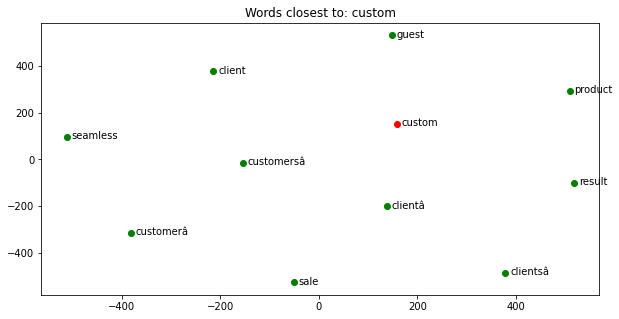

In [28]:
display_closestwords_tsnescatterplot(my_embedding.wv, "custom")

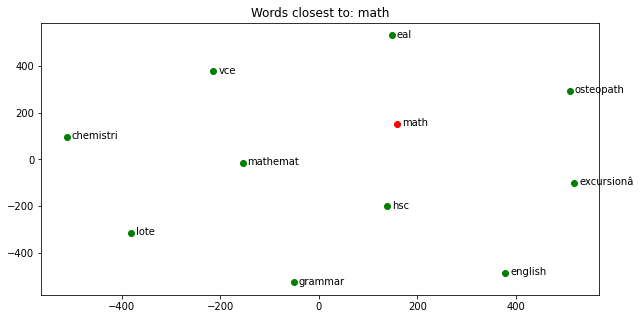

In [29]:
display_closestwords_tsnescatterplot(my_embedding.wv, "math")

In [30]:
visual_wv(my_embedding, 100)

Loading BokehJS ...

In [31]:
visual_wv(my_embedding, 1000)

Loading BokehJS ...

#### GloVe: Global Vectors for Word Representation

In [32]:
# All Import Statements Defined Here # Note: Do not add to this list.
# ----------------
import sys
assert sys.version_info[0]==3 
assert sys.version_info[1] >= 5
from gensim.models import KeyedVectors 
from gensim.test.utils import datapath 
import pprint
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 5] 
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD 
from sklearn.decomposition import PCA
START_TOKEN = '<START>' 
END_TOKEN = '<END>'
np.random.seed(1212) 
random.seed(1212)
# ----------------

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [33]:
""" Load GloVe Vectors"""
def load_embedding_model(data_job): 
    import gensim.downloader as api
    #data_job = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(data_job))
    print("The loaded object is of type %s" % str(type(data_job))) 
    return data_job

In [34]:
# ----------------------------------- # Run Cell to Load Word Vectors
# Note: This will take several minutes # (8 mins in my case )
# -----------------------------------
data_job = load_embedding_model(df)

Loaded vocab size 29654
The loaded object is of type <class 'pandas.core.frame.DataFrame'>


In [35]:
data_job.index

RangeIndex(start=0, stop=29654, step=1)

In [36]:
data_job

,job_description,job_type,category
0,"[year, experi, fresh, produc, want, manag, sto...",0,11
1,"[opportun, client, solut, analyst, provid, tec...",0,8
2,"[innov, busi, develop, role, awardwin, compani...",0,0
3,"[role, seek, automot, workshop, technician, jo...",0,0
4,"[â, earli, start, weekend, shift, experi, nece...",0,0
...,...,...,...
29649,"[hotel, snapshot, radisson, blu, plaza, sydney...",0,6
29650,"[organis, airservic, govern, own, organis, pro...",0,28
29651,"[compani, role, client, australiaâ, lead, comm...",0,5
29652,"[long, term, contract, month, possibl, extens,...",1,8


#### Train a complete model and then get its model.wv property, which contains independent keyed vectors. e.g., train vectors using word2vec.

In [37]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#model = Word2Vec(common_texts, window=5, min_count=1, workers=4)
model = Word2Vec(data_job, window=5, min_count=1, workers=4)
word_vectors = model.wv

#### Load word vector file from disk

In [38]:
from gensim.models import KeyedVectors

word_vectors.save("vectors_wv")
word_vectors = KeyedVectors.load("vectors_wv", mmap='r')

In [39]:
#word_vectors_m = model.wv

In [40]:
word_vectors = my_embedding.wv

In [41]:
analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

In [42]:
{key:value for key, value in word_vectors.key_to_index.items() if value<10}

{'â': 0,
 'work': 1,
 'experi': 2,
 'manag': 3,
 'role': 4,
 'team': 5,
 'servic': 6,
 'skill': 7,
 'provid': 8,
 'develop': 9}

In [43]:
word_vectors.get_vector('work')

array([-1.9507627 ,  1.0146029 ,  1.0702271 , -1.09274   , -0.23753747,
        2.345818  , -0.02056601, -1.1699958 ,  2.3283718 ,  0.5882244 ,
       -1.6269332 ,  0.4547017 , -0.23103994,  0.8603506 ,  0.2097447 ,
        1.8126026 ,  2.1914046 ,  3.0524237 ,  1.2384477 ,  0.32909718,
       -0.8360463 , -0.4356144 ,  0.00347651,  0.5036618 ,  1.5680369 ,
        3.7829072 ,  0.21651338,  0.8203105 , -0.68331975,  2.1179786 ,
       -0.257093  , -0.01681009, -1.2799481 , -0.7847436 ,  1.3500309 ,
        1.5619758 , -0.05659841,  0.32628757,  1.6478388 ,  3.3144503 ,
        1.2479017 , -0.23970324, -0.21563555, -1.8496777 ,  0.25740215,
        1.2076046 ,  3.3718114 , -0.55889475, -0.5681432 ,  0.06519304,
        1.0654566 ,  1.8309411 ,  1.1765432 ,  2.2018282 ,  2.1071627 ,
        0.48404068, -0.84435576,  0.05815728,  1.0042373 , -0.5717208 ,
       -1.3523595 ,  0.79126054, -1.71321   , -0.9088836 ,  0.7349794 ,
       -2.0533893 , -0.2595059 , -1.5880747 ,  0.46655884, -0.14

#### Reducing dimensionality of Word Embeddings

In [44]:
""" Put the GloVe vectors into a matrix M. Param:
wv_pretrained: KeyedVectors object; the 400000 GloVe vectors loaded from file
Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2Ind: dictionary mapping each word to its row number in M
"""
def get_matrix_of_vectors(wv_pretrained, required_words=['barrels', 'bpd', 'ecuador','energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']):
    import random
    words = list(wv_pretrained.key_to_index.keys())
    print("Shuffling words ...")
    random.seed(224)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2Ind and matrix M..." % len(words)) 
    word2Ind = {}
    M = []
    curInd = 0
    for w in words: 
        try:
            M.append(wv_pretrained.get_vector(w, norm=True)) 
            word2Ind[w] = curInd
            curInd += 1
        except KeyError: 
            continue
    for w in required_words:
        if w in words: 
            continue
        try:
            M.append(wv_pretrained.get_vector(w, norm=True)) 
            word2Ind[w] = curInd
            curInd += 1
        except KeyError: 
            continue
    M = np.stack(M) 
    print("Done.") 
    return M, word2Ind

### Word2Vec

**Using Pretrained Word2Vec Vectors**

In [45]:
from sklearn.manifold import TSNE 
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')

In [46]:
word_vectors.most_similar(positive=["powershel", "sccm"], negative=["sccm"])

[('bash', 0.9530633091926575),
 ('perl', 0.9224193096160889),
 ('mysql', 0.9156444072723389),
 ('plsql', 0.9116639494895935),
 ('mongodb', 0.9014299511909485),
 ('apach', 0.9001218676567078),
 ('python', 0.8969963192939758),
 ('tsql', 0.8958423137664795),
 ('script', 0.892011821269989),
 ('docker', 0.8869137763977051)]

**Plot using TSNE**

In [47]:
def display_closestwords_tsnescatterplot(model, word): 
    arr = np.empty((0,100), dtype='f')
    word_labels = [word] 
    # get close words
    close_words = model.similar_by_word(word)
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0) 
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]] 
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0) 
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005) 
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005) 
    plt.title(f'Words closest to: {word}')
    plt.show()

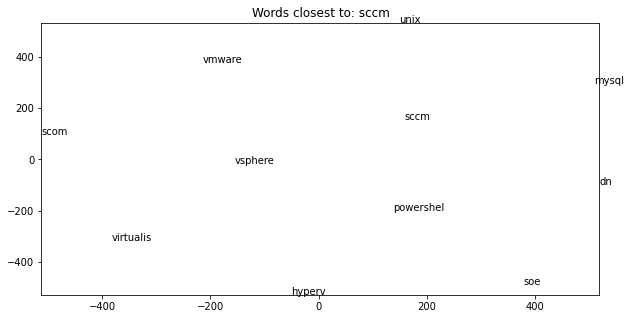

In [48]:
display_closestwords_tsnescatterplot(word_vectors, "sccm")

**Interactive Visualisation using bokeh**

In [49]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook 
from bokeh.models import ColumnDataSource, LabelSet 
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook 
from bokeh.models import ColumnDataSource, LabelSet 
import pandas as pd

In [50]:
'''makes an interactive scatter plot with text labels for each point'''
def interactive_tsne(text_labels, tsne_array):
    # Define a dataframe to be used by bokeh context
    bokeh_df = pd.DataFrame(tsne_array, text_labels, columns=['x','y']) 
    bokeh_df['text_labels'] = bokeh_df.index
# interactive controls to include to the plot
    TOOLS="hover, zoom_in, zoom_out, box_zoom, undo, redo, reset, box_select" 
    p = figure(tools=TOOLS, plot_width=700, plot_height=700)
# define data source for the plot
    source = ColumnDataSource(bokeh_df)
# scatter plot
    p.scatter('x', 'y', source=source, fill_alpha=0.6, fill_color="#8724B5", line_color=None)
# text labels
    labels = LabelSet(x='x', y='y', text='text_labels', y_offset=8, text_font_size="8pt", text_color="#555555", source=source, text_align='center')
    p.add_layout(labels)
# show plot inline
    output_notebook()
    show(p)

## Data Prepreocessing and Preparation

### Training my own Word2Vec Embeddings

**Pre-processing**

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

def identity_tokenizer(text):
    return text

df = pd.read_csv("./dataset/job.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(lambda x:x.split())


In [52]:
def gene_topword_by_label(df, label_colum, to_colum):
    df[to_colum] = ""
    for k in df[label_colum].value_counts().keys():

        df_tmp = df[df[label_colum]==k]
        tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False)    
        tfidf_matrix = tfidf.fit_transform(df_tmp['job_description'])
        xlabels = tfidf.get_feature_names_out()
        assert tfidf_matrix.shape[0] == len(df_tmp)

        for idx, row in zip(df_tmp.index, tfidf_matrix):
            
            row = row.toarray()[0].ravel()
            top_idx = row.argsort()[-10:][::-1]
            top_words = [xlabels[i] for i in top_idx]

            df[to_colum][idx] = top_words




In [53]:
gene_topword_by_label(df, label_colum='job_type', to_colum='10words_type')
gene_topword_by_label(df, label_colum='category', to_colum='10words_category')

In [54]:
from utils import split_by_jobtype
proportion = [0.7, 0.10, 0.20]
df = split_by_jobtype(df, proportion)
df.split.value_counts()

train    20757
test      5932
val       2965
Name: split, dtype: int64

In [55]:
df.to_csv("dataset/job_prapare.csv")

## Create data loader

In [56]:
from torch import nn
import pandas as pd
df = pd.read_csv("./dataset/job_prapare.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(eval)
df['10words_type']=df['10words_type'].apply(eval)
df['10words_category']=df['10words_category'].apply(eval)

In [57]:
sys.path

['/Users/liugensheng/OneDrive - The University of Western Australia/2022 sem1/CITS4012 NLP/project2',
 '/Users/liugensheng/miniconda3/lib/python39.zip',
 '/Users/liugensheng/miniconda3/lib/python3.9',
 '/Users/liugensheng/miniconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/liugensheng/miniconda3/lib/python3.9/site-packages']

In [58]:
def collate_fn(batch):
    batch_text_vectors = [b['text_vector'] for b in batch]
    batch_labels = [b['label'] for b in batch]


    batch_text_vectors = torch.tensor(np.stack(batch_text_vectors))
    batch_labels = torch.tensor(np.stack(batch_labels))


    batch_data = {
        'batch_text_vectors': batch_text_vectors,
        'batch_labels': batch_labels
    }

    return batch_data

In [59]:
from mydataset import JobVectorizer, JobDatasetOnehot, JobDatasetMyembedding, JobDatasetPretrainembedding
text_column = "10words_type"
label_column = "job_type"
label_nums = len(df[label_column].value_counts())

train_df = df[df.split=='train'].copy().reset_index(drop=True)
val_df = df[df.split=='val'].copy().reset_index(drop=True)
test_df = df[df.split=='test'].copy().reset_index(drop=True)

In [60]:
jobvectorizer = JobVectorizer.from_dataframe(df, text_column=text_column, cutoff=10)

jobtype_onehot_train = JobDatasetOnehot(train_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)
jobtype_onehot_val = JobDatasetOnehot(val_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)
jobtype_onehot_test = JobDatasetOnehot(test_df, vectorizer=jobvectorizer, text_column=text_column, label_column=label_column)


In [61]:
from gensim.models import KeyedVectors
my_embedding = KeyedVectors.load("./dataset/my_embedding", mmap='r')
jobtype_myembedding_train = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)
jobtype_myembedding_val = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)
jobtype_myembedding_test = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column)

In [62]:
jobtype_pretrainembedding_train = JobDatasetPretrainembedding(train_df, text_column=text_column, label_column=label_column)
jobtype_pretrainembedding_val = JobDatasetPretrainembedding(val_df, text_column=text_column, label_column=label_column)
jobtype_pretrainembedding_test = JobDatasetPretrainembedding(test_df, text_column=text_column, label_column=label_column)

#### 

In [63]:
import gensim
import re
from gensim.corpora import Dictionary

In [64]:
from gensim.models import Word2Vec
cores = 16
model = Word2Vec(min_count=1, 
                 window=2, vector_size=100, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

**Comparing the purposely trained and the pre-trained vectors**

In [65]:
# Our trained domain specific embeddings
word_vectors.most_similar(positive=["sccm"])

[('vsphere', 0.8840079307556152),
 ('vmware', 0.8793255090713501),
 ('soe', 0.8749751448631287),
 ('virtualis', 0.8664376139640808),
 ('unix', 0.864485502243042),
 ('hyperv', 0.8633731603622437),
 ('powershel', 0.8550437688827515),
 ('scom', 0.8535946607589722),
 ('mysql', 0.8357590436935425),
 ('dn', 0.8356968760490417)]

In [66]:
# Pretrained embeddings
word_vectors.most_similar(positive=["ubuntu"])

[('redhat', 0.939782440662384),
 ('nginx', 0.9359487891197205),
 ('cloudform', 0.913392186164856),
 ('scom', 0.9022396802902222),
 ('babel', 0.8975291848182678),
 ('elasticsearch', 0.8940725326538086),
 ('netscal', 0.8929364681243896),
 ('xen', 0.8927617073059082),
 ('kafka', 0.8914523720741272),
 ('openvswitchcontrailnsxnuagenfv', 0.8912717700004578)]

## Task 1: Binary Document Classification

### 3.1 Feed-forward Neural Netword

In [130]:
from torch import nn
import torch

from models import JobtypeClassifier_FeedForward, JobtypeClassifier_Conv1d
from utils import compute_accuracy, train_engin, test_engine, make_train_state
import torch.optim as optim 
from torch.utils.data import DataLoader

In [131]:
import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F 
import torch.optim as optim
%matplotlib inline

**Data and path information**

In [132]:
from argparse import Namespace
args = Namespace(
    # Data and path information
    batch_size=128,
    learning_rate=0.001,
    num_epochs=20,
    seed=1212,
    device=None,
    loss_func=None,
    optimizer=None)

**Define the model and train**

*`Build,train and compare the performance of the following models on Task 1, can switch among three embeddings (one-hot, pre-trained, domain specific). First create a baseline using the top 10 words only with a Feed-forward Neural Network model.Then use the top 10 words only with a CNN Conv1d based model. See Lab 09 for coding examples. Lastly, the full job description as input for a CNN Conv1d based model.`*

**text--10word/job_description; embedding--onehot/my_embedding/pretrain embedding; model--feed_forward/conv1d**

**`model 1: text--10word, embedding--onehot, model--feed_forward`**

In [133]:
# Model 1
state_jobtype_feedforward = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_onehot_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model
feature_len = len(jobvectorizer.text_vocab)
model_jobtype_feedforward = JobtypeClassifier_FeedForward(num_features=feature_len) 
model_jobtype_feedforward = model_jobtype_feedforward.to(args.device)

# loss and optimizer
args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_jobtype_feedforward.parameters(), lr=args.learning_rate)

In [134]:
train_engin(args, model_jobtype_feedforward, train_dataloader, val_dataloader, state_jobtype_feedforward)
test_engine(args, model_jobtype_feedforward, test_dataloader, state_jobtype_feedforward)
print(state_jobtype_feedforward)

TRAIN: 0|20


163it [00:03, 48.19it/s]


0.6295229712146924 67.776803973123
VAL:


24it [00:00, 51.73it/s]


0.6118717181185882 66.14583333333333

TRAIN: 1|20


163it [00:03, 48.06it/s]


0.5777978948288899 69.33291338007598
VAL:


24it [00:00, 50.95it/s]


0.592289333542188 68.10205853174602

TRAIN: 2|20


163it [00:03, 48.52it/s]


0.5535378437832088 71.10539000876423
VAL:


24it [00:00, 51.73it/s]


0.5798386124273142 68.81820436507935

TRAIN: 3|20


163it [00:03, 47.64it/s]


0.5349751460405945 73.02918675138768
VAL:


24it [00:00, 50.04it/s]


0.5714975992838541 70.19469246031746

TRAIN: 4|20


163it [00:03, 48.31it/s]


0.5215526171988507 74.20688175576977
VAL:


24it [00:00, 51.16it/s]


0.5653733250995476 71.27201140873015

TRAIN: 5|20


163it [00:03, 48.46it/s]


0.5107075372722254 75.44825445515629
VAL:


24it [00:00, 51.73it/s]


0.5618944987654686 71.63008432539681

TRAIN: 6|20


163it [00:03, 48.13it/s]


0.501478845904942 75.88349948875258
VAL:


24it [00:00, 51.84it/s]


0.5585965774953365 71.76029265873015

TRAIN: 7|20


163it [00:03, 48.19it/s]


0.4933488736489069 76.49745289219983
VAL:


24it [00:00, 51.38it/s]


0.5565326648453871 72.11836557539682

TRAIN: 8|20


163it [00:03, 48.24it/s]


0.4861179418359066 77.11711218229625
VAL:


24it [00:00, 50.71it/s]


0.5553731918334962 72.05326140873015

TRAIN: 9|20


163it [00:03, 47.45it/s]


0.4803874754101219 77.31658997955012
VAL:


24it [00:00, 51.48it/s]


0.5542971106866995 72.28422619047619

TRAIN: 10|20


163it [00:03, 48.41it/s]


0.47492477023528407 77.7100679228747
VAL:


24it [00:00, 51.27it/s]


0.5531105324625969 72.74305555555556

TRAIN: 11|20


163it [00:03, 48.01it/s]


0.46999829075087807 78.05127994449316
VAL:


24it [00:00, 52.41it/s]


0.5530673824250698 73.1693328373016

TRAIN: 12|20


163it [00:03, 47.15it/s]


0.46609262399878226 78.34707310838446
VAL:


24it [00:00, 49.22it/s]


0.5540228473643461 73.03912450396827

TRAIN: 13|20


163it [00:03, 44.11it/s]


0.4617278934256431 78.57279798422438
VAL:


24it [00:00, 49.41it/s]


0.5541944851477941 72.97402033730158

TRAIN: 14|20


163it [00:03, 46.95it/s]


0.4583112357949919 78.81153228162432
VAL:


24it [00:00, 50.71it/s]


0.5546979233622551 73.13678075396827

TRAIN: 15|20


163it [00:03, 45.99it/s]


0.4537725841706516 79.31228089395265
VAL:


24it [00:00, 52.12it/s]


0.5557490636905035 73.0716765873016

TRAIN: 16|20


163it [00:03, 49.35it/s]


0.45077470200924796 79.28785969909434
VAL:


24it [00:00, 52.98it/s]


0.5567581666012607 72.94146825396824

TRAIN: 17|20


163it [00:03, 43.81it/s]


0.44724065942998315 79.49966221151038
VAL:


24it [00:00, 49.92it/s]


0.5569788205126921 73.0716765873016

TRAIN: 18|20


163it [00:03, 45.20it/s]


0.4456185312724553 79.59940111013736
VAL:


24it [00:00, 51.32it/s]


0.5578529424965382 73.1693328373016

TRAIN: 19|20


163it [00:03, 46.53it/s]


0.44284814303638026 79.71443178498394
VAL:


24it [00:00, 49.35it/s]


0.5593290217220782 73.13678075396825



24it [00:00, 49.87it/s]

{'epoch_index': 19, 'train_loss': [0.6295229712146924, 0.5777978948288899, 0.5535378437832088, 0.5349751460405945, 0.5215526171988507, 0.5107075372722254, 0.501478845904942, 0.4933488736489069, 0.4861179418359066, 0.4803874754101219, 0.47492477023528407, 0.46999829075087807, 0.46609262399878226, 0.4617278934256431, 0.4583112357949919, 0.4537725841706516, 0.45077470200924796, 0.44724065942998315, 0.4456185312724553, 0.44284814303638026], 'train_acc': [67.776803973123, 69.33291338007598, 71.10539000876423, 73.02918675138768, 74.20688175576977, 75.44825445515629, 75.88349948875258, 76.49745289219983, 77.11711218229625, 77.31658997955012, 77.7100679228747, 78.05127994449316, 78.34707310838446, 78.57279798422438, 78.81153228162432, 79.31228089395265, 79.28785969909434, 79.49966221151038, 79.59940111013736, 79.71443178498394], 'val_loss': [0.6118717181185882, 0.592289333542188, 0.5798386124273142, 0.5714975992838541, 0.5653733250995476, 0.5618944987654686, 0.5585965774953365, 0.5565326648453

**`acc:73.13`**

**`model 2: text--10word, embedding--my_embedding, model--feed_forward`**

In [135]:
# Model 2
state_jobtype_myembedding_feedforward = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_myembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model
feature_len = 10 * 100
model_jobtype_myembedding_feedforward = JobtypeClassifier_FeedForward(num_features=feature_len) 
model_jobtype_myembedding_feedforward = model_jobtype_myembedding_feedforward.to(args.device)

# loss and optimizer
args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_jobtype_feedforward.parameters(), lr=args.learning_rate)

In [136]:
train_engin(args, model_jobtype_myembedding_feedforward, train_dataloader, val_dataloader, state_jobtype_myembedding_feedforward)
test_engine(args, model_jobtype_myembedding_feedforward, test_dataloader, state_jobtype_myembedding_feedforward)
print(state_jobtype_myembedding_feedforward)

TRAIN: 0|20


163it [00:01, 121.58it/s]


0.8276882522676621 47.93264314928423
VAL:


24it [00:00, 133.62it/s]


0.8308849061528841 47.20517113095238

TRAIN: 1|20


163it [00:01, 127.97it/s]


0.8269210944146465 47.95706434414257
VAL:


24it [00:00, 124.08it/s]


0.8308849061528841 47.20517113095238

TRAIN: 2|20


163it [00:01, 121.80it/s]


0.8261825778733003 48.079170318434095
VAL:


24it [00:00, 129.94it/s]


0.8308849061528841 47.20517113095238

TRAIN: 3|20


163it [00:01, 123.17it/s]


0.8266007271281052 47.95706434414257
VAL:


24it [00:00, 118.76it/s]


0.8308849061528841 47.20517113095238

TRAIN: 4|20


163it [00:01, 123.13it/s]


0.8277762320144048 48.00590673385918
VAL:


24it [00:00, 142.71it/s]


0.8308849061528841 47.20517113095238

TRAIN: 5|20


163it [00:01, 123.35it/s]


0.8276468175320539 47.90822195442595
VAL:


24it [00:00, 142.41it/s]


0.8308849061528841 47.20517113095238

TRAIN: 6|20


163it [00:01, 123.67it/s]


0.8276291134898646 47.932643149284246
VAL:


24it [00:00, 135.25it/s]


0.8308849061528841 47.20517113095238

TRAIN: 7|20


163it [00:01, 124.63it/s]


0.8271186172596513 47.981485539000886
VAL:


24it [00:00, 138.02it/s]


0.8308849061528841 47.20517113095238

TRAIN: 8|20


163it [00:01, 119.87it/s]


0.826739840712284 47.98148553900087
VAL:


24it [00:00, 131.35it/s]


0.8308849061528841 47.20517113095238

TRAIN: 9|20


163it [00:01, 125.64it/s]


0.8271021923404532 47.95706434414255
VAL:


24it [00:00, 139.18it/s]


0.8308849061528841 47.20517113095238

TRAIN: 10|20


163it [00:01, 122.78it/s]


0.8262554403463018 48.07917031843412
VAL:


24it [00:00, 132.71it/s]


0.8308849061528841 47.20517113095238

TRAIN: 11|20


163it [00:01, 125.98it/s]


0.826842717963494 48.05474912357582
VAL:


24it [00:00, 135.40it/s]


0.8308849061528841 47.20517113095238

TRAIN: 12|20


163it [00:01, 123.83it/s]


0.8274018022180335 47.90822195442594
VAL:


24it [00:00, 141.61it/s]


0.8308849061528841 47.20517113095238

TRAIN: 13|20


163it [00:01, 124.60it/s]


0.8262941961639497 48.0547491235758
VAL:


24it [00:00, 140.91it/s]


0.8308849061528841 47.20517113095238

TRAIN: 14|20


163it [00:01, 125.48it/s]


0.827751425146325 48.00590673385918
VAL:


24it [00:00, 136.71it/s]


0.8308849061528841 47.20517113095238

TRAIN: 15|20


163it [00:01, 121.12it/s]


0.8274136803632862 47.98148553900089
VAL:


24it [00:00, 145.57it/s]


0.8308849061528841 47.20517113095238

TRAIN: 16|20


163it [00:01, 127.05it/s]


0.8279602860380542 47.90822195442593
VAL:


24it [00:00, 133.87it/s]


0.8308849061528841 47.20517113095238

TRAIN: 17|20


163it [00:01, 124.54it/s]


0.8265232663213112 48.00590673385919
VAL:


24it [00:00, 132.39it/s]


0.8308849061528841 47.20517113095238

TRAIN: 18|20


163it [00:01, 123.24it/s]


0.827056090158919 47.932643149284246
VAL:


24it [00:00, 145.57it/s]


0.8308849061528841 47.20517113095238

TRAIN: 19|20


163it [00:01, 129.09it/s]


0.8272875481587978 47.932643149284274
VAL:


24it [00:00, 134.13it/s]


0.8308849061528841 47.20517113095238



47it [00:00, 137.73it/s]

{'epoch_index': 19, 'train_loss': [0.8276882522676621, 0.8269210944146465, 0.8261825778733003, 0.8266007271281052, 0.8277762320144048, 0.8276468175320539, 0.8276291134898646, 0.8271186172596513, 0.826739840712284, 0.8271021923404532, 0.8262554403463018, 0.826842717963494, 0.8274018022180335, 0.8262941961639497, 0.827751425146325, 0.8274136803632862, 0.8279602860380542, 0.8265232663213112, 0.827056090158919, 0.8272875481587978], 'train_acc': [47.93264314928423, 47.95706434414257, 48.079170318434095, 47.95706434414257, 48.00590673385918, 47.90822195442595, 47.932643149284246, 47.981485539000886, 47.98148553900087, 47.95706434414255, 48.07917031843412, 48.05474912357582, 47.90822195442594, 48.0547491235758, 48.00590673385918, 47.98148553900089, 47.90822195442593, 48.00590673385919, 47.932643149284246, 47.932643149284274], 'val_loss': [0.8308849061528841, 0.8308849061528841, 0.8308849061528841, 0.8308849061528841, 0.8308849061528841, 0.8308849061528841, 0.8308849061528841, 0.83088490615288

**`acc:47.78`**

**`model 3: text--10word, embedding--pretain embedding, model--feed_forward`**

In [137]:
# Model 3
state_jobtype_pretrainembedding_feedforward = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_pretrainembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_pretrainembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_pretrainembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

feature_len = 10 * 100
model_jobtype_pretrainembedding_feedforward = JobtypeClassifier_FeedForward(num_features=feature_len) 
model_jobtype_pretrainembedding_feedforward = model_jobtype_pretrainembedding_feedforward.to(args.device)

# loss and optimizer
args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_jobtype_feedforward.parameters(), lr=args.learning_rate)

In [138]:
train_engin(args, model_jobtype_pretrainembedding_feedforward, train_dataloader, val_dataloader, state_jobtype_pretrainembedding_feedforward)
test_engine(args, model_jobtype_pretrainembedding_feedforward, test_dataloader, state_jobtype_pretrainembedding_feedforward)
print(state_jobtype_pretrainembedding_feedforward)

TRAIN: 0|20


163it [00:01, 133.02it/s]


0.7149437954820742 46.98021654981012
VAL:


24it [00:00, 134.17it/s]


0.7131715267896652 47.32607886904761

TRAIN: 1|20


163it [00:01, 126.78it/s]


0.7148695866023104 47.00463774466841
VAL:


24it [00:00, 134.16it/s]


0.7131715267896652 47.32607886904761

TRAIN: 2|20


163it [00:01, 132.45it/s]


0.7152765751616357 46.85811057551856
VAL:


24it [00:00, 144.45it/s]


0.7131715267896652 47.32607886904761

TRAIN: 3|20


163it [00:01, 127.89it/s]


0.7147179787144343 47.029058939526735
VAL:


24it [00:00, 145.17it/s]


0.7131715267896652 47.32607886904761

TRAIN: 4|20


163it [00:01, 128.61it/s]


0.7151365027837226 46.98021654981009
VAL:


24it [00:00, 135.46it/s]


0.7131715267896652 47.32607886904761

TRAIN: 5|20


163it [00:01, 127.63it/s]


0.7148700096855869 46.98021654981012
VAL:


24it [00:00, 145.76it/s]


0.7131715267896652 47.32607886904761

TRAIN: 6|20


163it [00:01, 131.74it/s]


0.7148522913821638 47.02905893952673
VAL:


24it [00:00, 132.80it/s]


0.7131715267896652 47.32607886904761

TRAIN: 7|20


163it [00:01, 138.07it/s]


0.7147232071022311 46.98021654981011
VAL:


24it [00:00, 150.52it/s]


0.7131715267896652 47.32607886904761

TRAIN: 8|20


163it [00:01, 139.25it/s]


0.714957369251485 46.9557953549518
VAL:


24it [00:00, 146.15it/s]


0.7131715267896652 47.32607886904761

TRAIN: 9|20


163it [00:01, 137.92it/s]


0.7150945897482656 46.931374160093476
VAL:


24it [00:00, 150.71it/s]


0.7131715267896652 47.32607886904761

TRAIN: 10|20


163it [00:01, 138.06it/s]


0.7147666599852905 47.00463774466843
VAL:


24it [00:00, 151.05it/s]


0.7131715267896652 47.32607886904761

TRAIN: 11|20


163it [00:01, 137.47it/s]


0.7147593041139148 46.980216549810116
VAL:


24it [00:00, 134.21it/s]


0.7131715267896652 47.32607886904761

TRAIN: 12|20


163it [00:01, 128.69it/s]


0.7146932921526625 47.029058939526735
VAL:


24it [00:00, 138.08it/s]


0.7131715267896652 47.32607886904761

TRAIN: 13|20


163it [00:01, 132.46it/s]


0.7151051609794055 46.931374160093505
VAL:


24it [00:00, 134.50it/s]


0.7131715267896652 47.32607886904761

TRAIN: 14|20


163it [00:01, 128.17it/s]


0.7149191732786916 47.00463774466838
VAL:


24it [00:00, 138.02it/s]


0.7131715267896652 47.32607886904761

TRAIN: 15|20


163it [00:01, 131.31it/s]


0.7150053623263822 46.93137416009349
VAL:


24it [00:00, 147.94it/s]


0.7131715267896652 47.32607886904761

TRAIN: 16|20


163it [00:01, 133.14it/s]


0.7151716501434886 46.88253177037686
VAL:


24it [00:00, 145.70it/s]


0.7131715267896652 47.32607886904761

TRAIN: 17|20


163it [00:01, 131.39it/s]


0.7146797041220169 47.02905893952672
VAL:


24it [00:00, 144.55it/s]


0.7131715267896652 47.32607886904761

TRAIN: 18|20


163it [00:01, 133.64it/s]


0.7146907108693035 46.9802165498101
VAL:


24it [00:00, 146.92it/s]


0.7131715267896652 47.32607886904761

TRAIN: 19|20


163it [00:01, 134.19it/s]


0.7148788966284211 46.98021654981009
VAL:


24it [00:00, 143.48it/s]


0.7131715267896652 47.32607886904761



47it [00:00, 144.98it/s]

{'epoch_index': 19, 'train_loss': [0.7149437954820742, 0.7148695866023104, 0.7152765751616357, 0.7147179787144343, 0.7151365027837226, 0.7148700096855869, 0.7148522913821638, 0.7147232071022311, 0.714957369251485, 0.7150945897482656, 0.7147666599852905, 0.7147593041139148, 0.7146932921526625, 0.7151051609794055, 0.7149191732786916, 0.7150053623263822, 0.7151716501434886, 0.7146797041220169, 0.7146907108693035, 0.7148788966284211], 'train_acc': [46.98021654981012, 47.00463774466841, 46.85811057551856, 47.029058939526735, 46.98021654981009, 46.98021654981012, 47.02905893952673, 46.98021654981011, 46.9557953549518, 46.931374160093476, 47.00463774466843, 46.980216549810116, 47.029058939526735, 46.931374160093505, 47.00463774466838, 46.93137416009349, 46.88253177037686, 47.02905893952672, 46.9802165498101, 46.98021654981009], 'val_loss': [0.7131715267896652, 0.7131715267896652, 0.7131715267896652, 0.7131715267896652, 0.7131715267896652, 0.7131715267896652, 0.7131715267896652, 0.713171526789

**`acc:47.88`**

In [139]:
from argparse import Namespace
args = Namespace(
    # Data and path information
    batch_size=128,
    learning_rate=0.001,
    num_epochs=5,
    seed=1234,
    num_channels = 1,
    hidden_dim = 100,
    dropout_p = 0.1,
    device=None,
    loss_func=None,
    optimizer=None)

**`model 4: text--10word, embedding--onehot, model--conv1d`**

*do not exist*

In [140]:

'''
state_jobtype_conv1d = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_onehot_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_onehot_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model
feature_len = len(jobvectorizer.text_vocab)
model_jobtype_cov1d = JobtypeClassifier_Conv1d(embedding_size=feature_len, num_channels=args.num_channels,hidden_dim=args.hidden_dim, label_nums=2, dropout_p=args.dropout_p)

model_jobtype_cov1d = model_jobtype_cov1d.to(args.device)

# loss and optimizer
args.loss_func = nn.BCEWithLogitsLoss()
args.optimizer = optim.Adam(model_jobtype_cov1d.parameters(), lr=args.learning_rate)
'''
t = 1

**Visualizing Results Function**

In [141]:
def visualize_results(perceptron, x_data, y_truth, n_samples=1000, ax=None,epoch=None,title='', levels=[0.3, 0.4, 0.5], linestyles=['--', '-', '--']): 
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32) 
    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32) 
    n_classes = 2
    all_x = [[] for _ in range(n_classes)] 
    all_colors = [[] for _ in range(n_classes)]
    colors = ['black', 'white'] 
    markers = ['o', '*']
    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth): 
        all_x[y_true_i].append(x_i)
        if y_pred_i == y_true_i:
            all_colors[y_true_i].append("white") 
        else:
            all_colors[y_true_i].append("black") 
            #all_colors[y_true_i].append(colors[y_pred_i])
    all_x = [np.stack(x_list) for x_list in all_x] 
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10,10))
        
    for x_list, color_list, marker in zip(all_x, all_colors, markers): 
        ax.scatter(x_list[:, 0], x_list[:, 1], edgecolor="black", marker=marker, facecolor=color_list, s=300)
    xlim = (min([x_list[:,0].min() for x_list in all_x]), max([x_list[:,0].max() for x_list in all_x])) 
    ylim = (min([x_list[:,1].min() for x_list in all_x]), max([x_list[:,1].max() for x_list in all_x])) 
    # hyperplane
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30) 
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=levels, linestyles=linestyles)
    plt.suptitle(title)
    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

In [142]:
import torch.functional as F

class JobtypeClassifier_Conv1d(nn.Module):
    def __init__(self, embedding_size, num_channels, hidden_dim, label_nums, dropout_p):

        super(JobtypeClassifier_Conv1d, self).__init__()
        self.convnet = nn.Sequential(
            nn.Conv1d(in_channels=embedding_size,
            out_channels=num_channels, kernel_size=3),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels,
            kernel_size=3, stride=2, padding=2),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels,
            kernel_size=3, stride=2,  padding=2),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels,
            kernel_size=3),
            nn.ELU()
            )

        self.drop = nn.Dropout(dropout_p)
        self.drop2 = nn.Dropout(dropout_p)
        self.pool = nn.AvgPool1d(2)
        self.rlue = nn.ReLU()
        self.fc1 = nn.Linear(num_channels, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, label_nums)
        
    def forward(self, x_in, apply_softmax=False):

        x_embedded = x_in.permute(0, 2, 1)
        features = self.convnet(x_embedded)
        # print(features.shape)


        features = self.pool(features).squeeze(dim=2)
        features = self.drop(features)
        features = self.fc1(features)
        features = self.drop2(features)

        features = self.rlue(features)
        prediction_vector = self.fc2(features).squeeze(dim=1)

        if apply_softmax:
             prediction_vector = F.softmax(prediction_vector, dim=1)
             
        return prediction_vector

## Conv1d

**Initial setup**

In [156]:
from argparse import Namespace
args = Namespace(
    # Data and path information
    batch_size=128,
    learning_rate=0.001,
    num_epochs=20,
    seed=1234,
    num_channels = 1,
    hidden_dim = 100,
    dropout_p = 0.1,
    device=None,
    loss_func=None,
    optimizer=None)

**`model 5: text--10word, embedding--my_embedding, model--conv1d`**

In [144]:
# Model 5
state_jobtype_myembedding_conv1d = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_myembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model
model_jobtype_myembedding_conv1d = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=10, 
                                            hidden_dim=args.hidden_dim, label_nums=2, dropout_p=args.dropout_p)
model_jobtype_myembedding_conv1d = model_jobtype_myembedding_conv1d.to(args.device)

# loss and optimizer
args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_jobtype_myembedding_conv1d.parameters(), lr=args.learning_rate)

In [145]:
train_engin(args, model_jobtype_myembedding_conv1d, train_dataloader, val_dataloader, state_jobtype_myembedding_conv1d)
test_engine(args, model_jobtype_myembedding_conv1d, test_dataloader, state_jobtype_myembedding_conv1d)
print(state_jobtype_myembedding_conv1d)

TRAIN: 0|20


163it [00:02, 80.78it/s]


0.6157159607834611 67.34726482617585
VAL:


24it [00:00, 115.47it/s]


0.6089040065805117 66.9038318452381

TRAIN: 1|20


163it [00:02, 80.95it/s]


0.5863464416170412 69.50979586619925
VAL:


24it [00:00, 111.52it/s]


0.5995223447680472 67.94549851190477

TRAIN: 2|20


163it [00:02, 80.06it/s]


0.5705989813146419 71.03166995325738
VAL:


24it [00:00, 119.03it/s]


0.5929161173601945 68.72984871031747

TRAIN: 3|20


163it [00:01, 82.55it/s]


0.556940156989303 72.03476482617594
VAL:


24it [00:00, 118.71it/s]


0.5880269433061283 69.0584697420635

TRAIN: 4|20


163it [00:01, 83.22it/s]


0.5473520497968589 72.80300540461585
VAL:


24it [00:00, 117.99it/s]


0.5781549761692684 70.86433531746033

TRAIN: 5|20


163it [00:01, 81.51it/s]


0.5382100120643899 73.41513292433538
VAL:


24it [00:00, 111.72it/s]


0.581816293299198 69.98232886904762

TRAIN: 6|20


163it [00:02, 79.16it/s]


0.5323962413825868 74.05122516798134
VAL:


24it [00:00, 111.15it/s]


0.5753918935855229 69.9466765873016

TRAIN: 7|20


163it [00:02, 80.64it/s]


0.5245969306471887 74.28653593339178
VAL:


24it [00:00, 110.83it/s]


0.5829738254348436 70.07068452380952

TRAIN: 8|20


163it [00:02, 78.22it/s]


0.5193177304384897 74.76058099620214
VAL:


24it [00:00, 105.83it/s]


0.5769731476902961 70.63957093253967

TRAIN: 9|20


163it [00:02, 80.66it/s]


0.5125011569517525 75.35673203330414
VAL:


24it [00:00, 108.63it/s]


0.572075874855121 71.29371279761905

TRAIN: 10|20


163it [00:02, 80.34it/s]


0.5041780349301417 75.77029469763366
VAL:


24it [00:00, 103.54it/s]


0.5766854695975782 71.39136904761904

TRAIN: 11|20


163it [00:02, 80.20it/s]


0.5009563316596798 75.81822414548637
VAL:


24it [00:00, 112.40it/s]


0.5734112200637658 70.79303075396825

TRAIN: 12|20


163it [00:02, 80.98it/s]


0.4942903633863649 76.34750219106047
VAL:


24it [00:00, 115.01it/s]


0.5977946569522221 70.75737847222224

TRAIN: 13|20


163it [00:02, 81.19it/s]


0.49107847257625825 76.63987182296229
VAL:


24it [00:00, 110.64it/s]


0.5799537884692351 71.16350446428571

TRAIN: 14|20


163it [00:01, 83.12it/s]


0.48335870954156646 76.97286736780603
VAL:


24it [00:00, 119.34it/s]


0.584692823390166 71.58668154761904

TRAIN: 15|20


163it [00:01, 83.54it/s]


0.4790883276360168 77.24560874963477
VAL:


24it [00:00, 117.59it/s]


0.5851432618995508 71.08909970238098

TRAIN: 16|20


163it [00:01, 83.66it/s]


0.47526792423125447 77.59983019281331
VAL:


24it [00:00, 118.56it/s]


0.5872285390893619 70.70467509920634

TRAIN: 17|20


163it [00:01, 83.49it/s]


0.47156628454389754 77.71828439964942
VAL:


24it [00:00, 118.78it/s]


0.5922264568507671 71.13095238095238

TRAIN: 18|20


163it [00:01, 83.90it/s]


0.46608189607690464 77.96546340929011
VAL:


24it [00:00, 119.16it/s]


0.5947674103081226 71.19605654761904

TRAIN: 19|20


163it [00:01, 84.19it/s]


0.46433810880579096 78.24299773590417
VAL:


24it [00:00, 119.08it/s]


0.6028777857621511 70.82868303571426



47it [00:00, 117.06it/s]

{'epoch_index': 19, 'train_loss': [0.6157159607834611, 0.5863464416170412, 0.5705989813146419, 0.556940156989303, 0.5473520497968589, 0.5382100120643899, 0.5323962413825868, 0.5245969306471887, 0.5193177304384897, 0.5125011569517525, 0.5041780349301417, 0.5009563316596798, 0.4942903633863649, 0.49107847257625825, 0.48335870954156646, 0.4790883276360168, 0.47526792423125447, 0.47156628454389754, 0.46608189607690464, 0.46433810880579096], 'train_acc': [67.34726482617585, 69.50979586619925, 71.03166995325738, 72.03476482617594, 72.80300540461585, 73.41513292433538, 74.05122516798134, 74.28653593339178, 74.76058099620214, 75.35673203330414, 75.77029469763366, 75.81822414548637, 76.34750219106047, 76.63987182296229, 76.97286736780603, 77.24560874963477, 77.59983019281331, 77.71828439964942, 77.96546340929011, 78.24299773590417], 'val_loss': [0.6089040065805117, 0.5995223447680472, 0.5929161173601945, 0.5880269433061283, 0.5781549761692684, 0.581816293299198, 0.5753918935855229, 0.5829738254

**`acc:70.58`**

**`model 6: text--10word, embedding--pretrain embedding, model--conv1d`**

In [146]:
# Model 6
state_jobtype_pretrainembedding_conv1d = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_pretrainembedding_train, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_pretrainembedding_val, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_pretrainembedding_test, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model
model_jobtype_pretrainembedding_conv1d = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=10, 
                                            hidden_dim=args.hidden_dim, label_nums=2, dropout_p=args.dropout_p)
model_jobtype_pretrainembedding_conv1d = model_jobtype_pretrainembedding_conv1d.to(args.device)

# loss and optimizer
args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_jobtype_pretrainembedding_conv1d.parameters(), lr=args.learning_rate)

In [147]:
train_engin(args, model_jobtype_pretrainembedding_conv1d, train_dataloader, val_dataloader, state_jobtype_pretrainembedding_conv1d)
test_engine(args, model_jobtype_pretrainembedding_conv1d, test_dataloader, state_jobtype_pretrainembedding_conv1d)
print(state_jobtype_pretrainembedding_conv1d)

TRAIN: 0|20


163it [00:01, 86.66it/s]


0.6272878668790945 67.33334246275199
VAL:


24it [00:00, 124.20it/s]


0.6273286466797193 65.49479166666667

TRAIN: 1|20


163it [00:01, 85.39it/s]


0.60685867107719 68.05274065147535
VAL:


24it [00:00, 123.49it/s]


0.624539123227199 65.85286458333333

TRAIN: 2|20


163it [00:01, 85.12it/s]


0.5991626806054375 68.71667762196905
VAL:


24it [00:00, 123.58it/s]


0.6216932100554305 65.91796875000001

TRAIN: 3|20


163it [00:01, 87.05it/s]


0.5935820410588037 69.48149466841949
VAL:


24it [00:00, 124.86it/s]


0.6225106728573641 66.2140376984127

TRAIN: 4|20


163it [00:01, 86.78it/s]


0.5893660154810713 69.8065019719544
VAL:


24it [00:00, 123.41it/s]


0.6230520258347193 66.34424603174602

TRAIN: 5|20


163it [00:01, 86.37it/s]


0.5831297652487372 70.45491893076247
VAL:


24it [00:00, 122.60it/s]


0.6238237706323465 66.53645833333331

TRAIN: 6|20


163it [00:01, 85.11it/s]


0.5808112882763334 70.61514022787028
VAL:


24it [00:00, 123.80it/s]


0.6261618336041769 66.64031498015873

TRAIN: 7|20


163it [00:01, 86.30it/s]


0.5762591857485975 70.91800869120654
VAL:


24it [00:00, 122.72it/s]


0.626045590887467 66.54575892857142

TRAIN: 8|20


163it [00:01, 86.63it/s]


0.5732390655696026 71.52146326321937
VAL:


24it [00:00, 123.25it/s]


0.6224614245196183 66.61086309523807

TRAIN: 9|20


163it [00:01, 87.02it/s]


0.5687249699618919 71.75859991235752
VAL:


24it [00:00, 123.84it/s]


0.6328774789969127 67.29445684523807

TRAIN: 10|20


163it [00:01, 86.56it/s]


0.5664193429098541 72.2762379491674
VAL:


24it [00:00, 114.93it/s]


0.6282442423204581 66.83872767857142

TRAIN: 11|20


163it [00:01, 87.05it/s]


0.5634055687971642 72.46658632778264
VAL:


24it [00:00, 124.45it/s]


0.6305623662968477 66.5132068452381

TRAIN: 12|20


163it [00:01, 87.02it/s]


0.5598859382919008 72.76808537832305
VAL:


24it [00:00, 124.44it/s]


0.6311881244182586 67.23245287698413

TRAIN: 13|20


163it [00:01, 86.42it/s]


0.5575571204621373 73.05132559158633
VAL:


24it [00:00, 122.28it/s]


0.6360117134948572 66.93638392857143

TRAIN: 14|20


163it [00:01, 86.53it/s]


0.5540318198364937 73.38774466841957
VAL:


24it [00:00, 123.65it/s]


0.6311710091928642 67.45721726190477

TRAIN: 15|20


163it [00:01, 86.70it/s]


0.5498845782016685 73.64519427402867
VAL:


24it [00:00, 124.26it/s]


0.630567600329717 67.52232142857142

TRAIN: 16|20


163it [00:01, 85.91it/s]


0.5479713347426223 74.02999926964652
VAL:


24it [00:00, 122.87it/s]


0.6311134584248066 67.58742559523809

TRAIN: 17|20


163it [00:01, 85.81it/s]


0.5455536072605228 74.13932405784395
VAL:


24it [00:00, 122.85it/s]


0.6420445181429385 67.58432539682543

TRAIN: 18|20


163it [00:01, 85.33it/s]


0.540864942995317 74.36071245983058
VAL:


24it [00:00, 123.26it/s]


0.6380160674452782 67.22625248015872

TRAIN: 19|20


163it [00:01, 86.99it/s]


0.5366209081711206 74.81512927256796
VAL:


24it [00:00, 123.93it/s]


0.6383417397737503 67.29135664682539



47it [00:00, 122.76it/s]

{'epoch_index': 19, 'train_loss': [0.6272878668790945, 0.60685867107719, 0.5991626806054375, 0.5935820410588037, 0.5893660154810713, 0.5831297652487372, 0.5808112882763334, 0.5762591857485975, 0.5732390655696026, 0.5687249699618919, 0.5664193429098541, 0.5634055687971642, 0.5598859382919008, 0.5575571204621373, 0.5540318198364937, 0.5498845782016685, 0.5479713347426223, 0.5455536072605228, 0.540864942995317, 0.5366209081711206], 'train_acc': [67.33334246275199, 68.05274065147535, 68.71667762196905, 69.48149466841949, 69.8065019719544, 70.45491893076247, 70.61514022787028, 70.91800869120654, 71.52146326321937, 71.75859991235752, 72.2762379491674, 72.46658632778264, 72.76808537832305, 73.05132559158633, 73.38774466841957, 73.64519427402867, 74.02999926964652, 74.13932405784395, 74.36071245983058, 74.81512927256796], 'val_loss': [0.6273286466797193, 0.624539123227199, 0.6216932100554305, 0.6225106728573641, 0.6230520258347193, 0.6238237706323465, 0.6261618336041769, 0.626045590887467, 0.6

**`acc:67.38`**

## Full Description

In [168]:
import pandas as pd
df = pd.read_csv("./dataset/job_prapare.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(eval)
df['10words_type']=df['10words_type'].apply(eval)
df['10words_category']=df['10words_category'].apply(eval)

text_column = "job_description"
label_column = "job_type"
label_nums = len(df[label_column].value_counts())

train_df = df[df.split=='train'].copy().reset_index(drop=True)
val_df = df[df.split=='val'].copy().reset_index(drop=True)
test_df = df[df.split=='test'].copy().reset_index(drop=True)

**`model 11: text--job_description, embedding--my_embedding, model--conv1d`**

In [169]:
# Model 11
from gensim.models import KeyedVectors
my_embedding = KeyedVectors.load("./dataset/my_embedding", mmap='r')
my_embedding.wv.add_vectors("<pad>", torch.zeros(100))

jobtype_myembedding_train_full = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)
jobtype_myembedding_val_full = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)
jobtype_myembedding_test_full = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)


In [179]:
from argparse import Namespace
args = Namespace(
    # Data and path information
    batch_size=128,
    learning_rate=0.001,
    num_epochs=20,
    seed=1212,
    num_channels = 1,
    hidden_dim = 100,
    dropout_p = 0.1,
    device=None,
    loss_func=None,
    optimizer=None)

In [180]:
    # Model 11

    state_jobtype_myembedding_conv1d_full = make_train_state(args) 
    args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_dataloader = DataLoader(jobtype_myembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(jobtype_myembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(jobtype_myembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

    # model
    model_jobtype_myembedding_conv1d_full = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=128, 
                                                hidden_dim=args.hidden_dim, label_nums=2, dropout_p=args.dropout_p)
    model_jobtype_myembedding_conv1d_full = model_jobtype_myembedding_conv1d_full.to(args.device)

    # loss and optimizer
    args.loss_func = nn.CrossEntropyLoss()
    args.optimizer = optim.Adam(model_jobtype_myembedding_conv1d_full.parameters(), lr=args.learning_rate)

In [181]:
train_engin(args, model_jobtype_myembedding_conv1d_full, train_dataloader, val_dataloader, state_jobtype_myembedding_conv1d_full)
test_engine(args, model_jobtype_myembedding_conv1d_full, test_dataloader, state_jobtype_myembedding_conv1d_full)
print(state_jobtype_myembedding_conv1d_full)

TRAIN: 0|20


0it [00:00, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16384x15 and 128x100)

**acc: 80.00**

**`model 12: text--job_description, embedding--pretrain embedding, model--conv1d`**

In [173]:
# Model 12

jobtype_prainembedding_train_full = JobDatasetPretrainembedding(train_df, text_column=text_column, label_column=label_column, words_len=128)
jobtype_prainembedding_val_full = JobDatasetPretrainembedding(val_df, text_column=text_column, label_column=label_column, words_len=128)
jobtype_prainembedding_test_full = JobDatasetPretrainembedding(test_df, text_column=text_column, label_column=label_column, words_len=128)


In [174]:
# Model 12

state_jobtype_pretrainembedding_conv1d_full = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_dataloader = DataLoader(jobtype_prainembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_prainembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_prainembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model
model_jobtype_pretrainembedding_conv1d_full = JobtypeClassifier_Conv1d(embedding_size=100, num_channels=128, 
                                            hidden_dim=args.hidden_dim, label_nums=2, dropout_p=args.dropout_p)
model_jobtype_pretrainembedding_conv1d_full = model_jobtype_pretrainembedding_conv1d_full.to(args.device)

# loss and optimizer
args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_jobtype_pretrainembedding_conv1d_full.parameters(), lr=args.learning_rate)

In [175]:
train_engin(args, model_jobtype_pretrainembedding_conv1d_full, train_dataloader, val_dataloader, state_jobtype_pretrainembedding_conv1d_full)
test_engine(args, model_jobtype_pretrainembedding_conv1d_full, test_dataloader, state_jobtype_pretrainembedding_conv1d_full)
print(state_jobtype_pretrainembedding_conv1d_full)

TRAIN: 0|5


0it [00:00, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16384x15 and 128x100)

In [182]:
import pandas as pd
from pprint import pprint
import torch
import nltk
nltk.download('omw-1.4')

from mydataset import JobVectorizer, JobDatasetOnehot, JobDatasetMyembedding, JobDatasetPretrainembedding
from mydataset import collate_fn
from torch.utils.data import DataLoader
from utils import compute_accuracy, train_engin, test_engine, make_train_state
import torch.optim as optim 

from tqdm import tqdm
from torch import nn
import torch.functional as F

from models import RnnModel1, RnnModel2


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liugensheng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [183]:

from argparse import Namespace
args = Namespace(
    batch_size=128,
    learning_rate=0.001,
    num_epochs=50,
    seed=1212,
    device=None,
    loss_func=None,
    optimizer=None)


In [184]:
import pandas as pd
df = pd.read_csv("./dataset/job_prapare.csv", index_col=0)
df = df.dropna().reset_index(drop=True)
df['job_description']=df['job_description'].apply(eval)
df['10words_type']=df['10words_type'].apply(eval)
df['10words_category']=df['10words_category'].apply(eval)

text_column = "job_description"
label_column = "category"
label_nums = len(df[label_column].value_counts())

train_df = df[df.split=='train'].copy().reset_index(drop=True)
val_df = df[df.split=='val'].copy().reset_index(drop=True)
test_df = df[df.split=='test'].copy().reset_index(drop=True)

In [185]:
from gensim.models import KeyedVectors
my_embedding = KeyedVectors.load("./dataset/my_embedding", mmap='r')
my_embedding.wv.add_vectors("<pad>", torch.zeros(100))

jobtype_myembedding_train_full = JobDatasetMyembedding(train_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)
jobtype_myembedding_val_full = JobDatasetMyembedding(val_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)
jobtype_myembedding_test_full = JobDatasetMyembedding(test_df, embedding=my_embedding.wv, text_column=text_column, label_column=label_column, words_len=128)

jobtype_prainembedding_train_full = JobDatasetPretrainembedding(train_df, text_column=text_column, label_column=label_column, words_len=128)
jobtype_prainembedding_val_full = JobDatasetPretrainembedding(val_df, text_column=text_column, label_column=label_column, words_len=128)
jobtype_prainembedding_test_full = JobDatasetPretrainembedding(test_df, text_column=text_column, label_column=label_column, words_len=128)


In [186]:

# Model 13
state_myembeding_rnn_full = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_dataloader = DataLoader(jobtype_myembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_myembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_myembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model_myembedding_rnn_full = RnnModel1(n_features=100, hidden_dim=128, n_outputs=label_nums)
model_myembedding_rnn_full = RnnModel2(embedding_size=100, num_embeddings=128, num_classes=label_nums, rnn_hidden_size=64)

args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_myembedding_rnn_full.parameters(), lr=args.learning_rate)


In [187]:
train_engin(args, model_myembedding_rnn_full, train_dataloader, val_dataloader, state_myembeding_rnn_full)
test_engine(args, model_myembedding_rnn_full, test_dataloader, state_myembeding_rnn_full)
print(state_myembeding_rnn_full)

TRAIN: 0|50


163it [00:30,  5.28it/s]


3.1458466594204575 11.030391834647967
VAL:


24it [00:01, 13.17it/s]


3.013978789250056 15.17237103174603

TRAIN: 1|50


163it [00:21,  7.42it/s]


2.961711431573505 16.809770303827044
VAL:


24it [00:01, 13.70it/s]


2.8975216845671334 16.83562748015873

TRAIN: 2|50


163it [00:20,  8.14it/s]


2.9200075433298123 18.210223122991522
VAL:


24it [00:01, 13.74it/s]


2.7663787504037223 21.40531994047619

TRAIN: 3|50


163it [00:38,  4.27it/s]


2.875646221125783 17.67250036517675
VAL:


24it [00:01, 13.78it/s]


2.8237350781758623 17.743985615079364

TRAIN: 4|50


163it [00:40,  3.98it/s]


2.915670210598436 17.869011101373065
VAL:


24it [00:01, 13.79it/s]


2.8695675233999896 18.202814980158728

TRAIN: 5|50


163it [00:41,  3.93it/s]


2.846124257046752 19.461181711948573
VAL:


24it [00:01, 13.66it/s]


2.7869199613730116 19.511098710317455

TRAIN: 6|50


163it [00:25,  6.44it/s]


2.7606255730236944 21.31696428571429
VAL:


24it [00:01, 13.83it/s]


2.7071998318036394 20.943390376984123

TRAIN: 7|50


163it [00:20,  7.83it/s]


2.7639272549401044 20.242888182880517
VAL:


24it [00:01, 13.77it/s]


2.719646294911702 20.256696428571423

TRAIN: 8|50


163it [00:19,  8.39it/s]


2.7726668770327905 19.687819529652362
VAL:


24it [00:01, 13.89it/s]


2.724610914786657 20.496961805555554

TRAIN: 9|50


163it [00:26,  6.05it/s]


2.7680078371902175 21.039429959100193
VAL:


24it [00:01, 13.24it/s]


2.754826178153356 21.52932787698413

TRAIN: 10|50


163it [00:22,  7.35it/s]


2.777808732050327 21.149211218229617
VAL:


24it [00:01, 13.70it/s]


2.806942751010259 18.827504960317462

TRAIN: 11|50


163it [00:34,  4.76it/s]


2.7597534978316594 20.76006974875841
VAL:


24it [00:01, 13.44it/s]


2.7449394961198164 20.422557043650798

TRAIN: 12|50


163it [00:30,  5.33it/s]


2.7598153754977375 20.760069748758387
VAL:


24it [00:01, 13.80it/s]


2.733037362496058 20.913938492063494

TRAIN: 13|50


163it [00:33,  4.89it/s]


2.7385952341044617 21.569164475606197
VAL:


24it [00:01, 13.41it/s]


2.6786684095859523 21.402219742063494

TRAIN: 14|50


163it [00:44,  3.68it/s]


2.798522204709199 20.2006646216769
VAL:


24it [00:01, 13.79it/s]


2.7979048589865365 19.283234126984127

TRAIN: 15|50


163it [00:39,  4.08it/s]


2.8192738345795605 19.683026584867083
VAL:


24it [00:01, 13.86it/s]


2.773594895998637 18.990265376984127

TRAIN: 16|50


163it [00:37,  4.34it/s]


2.7945691881004295 20.091339833479402
VAL:


24it [00:01, 13.92it/s]


2.7812227308750153 19.901723710317462

TRAIN: 17|50


163it [00:32,  4.95it/s]


2.7905698612423766 20.558766067776798
VAL:


24it [00:01, 13.88it/s]


2.76177195707957 20.455109126984123

TRAIN: 18|50


163it [00:27,  5.96it/s]


2.7601006791635534 21.216768916155416
VAL:


24it [00:01, 13.89it/s]


2.73454999923706 21.008494543650798

TRAIN: 19|50


163it [00:26,  6.05it/s]


2.781510430610983 20.764862693543687
VAL:


24it [00:01, 13.19it/s]


2.8113963206609083 18.85695684523809

TRAIN: 20|50


163it [00:26,  6.08it/s]


2.77439336688972 21.034180543383002
VAL:


24it [00:01, 12.69it/s]


2.7307664056619005 21.724640376984127

TRAIN: 21|50


163it [00:24,  6.66it/s]


2.7233006061951817 22.716504163014907
VAL:


24it [00:01, 13.42it/s]


2.743520200252533 21.002294146825395

TRAIN: 22|50


163it [00:31,  5.18it/s]


2.78892720988923 21.18230536079462
VAL:


24it [00:01, 13.43it/s]


2.728175828854243 21.62388392857143

TRAIN: 23|50


163it [00:24,  6.55it/s]


2.7636818871176323 22.116929593923473
VAL:


24it [00:01, 13.41it/s]


2.7565301756064096 21.203807043650787

TRAIN: 24|50


163it [00:23,  6.98it/s]


2.7156486979291485 23.521262416009353
VAL:


24it [00:01, 13.46it/s]


2.675462514162063 22.76630704365079

TRAIN: 25|50


163it [00:22,  7.25it/s]


2.680489845802448 24.331270084721012
VAL:


24it [00:01, 13.44it/s]


2.6714703738689423 23.449900793650798

TRAIN: 26|50


163it [00:23,  6.82it/s]


2.7519687128944628 22.43805689453696
VAL:


24it [00:01, 13.48it/s]


2.6604781945546474 24.136594742063494

TRAIN: 27|50


163it [00:35,  4.63it/s]


2.8173365373552945 19.543118244230193
VAL:


24it [00:01, 12.93it/s]


2.725821226835251 21.692088293650794

TRAIN: 28|50


163it [00:38,  4.28it/s]


2.8692428012567057 17.45293784691791
VAL:


24it [00:01, 13.47it/s]


2.8343270719051366 18.205915178571427

TRAIN: 29|50


163it [00:32,  5.07it/s]


2.8060436453556004 19.242075664621673
VAL:


24it [00:01, 13.23it/s]


2.7587877313296003 20.68607390873016

TRAIN: 30|50


163it [00:32,  4.99it/s]


2.763046609843435 22.021070698217926
VAL:


24it [00:01, 13.44it/s]


2.741732180118561 21.4936755952381

TRAIN: 31|50


163it [00:33,  4.82it/s]


2.7848863118996654 21.344352541630155
VAL:


24it [00:01, 13.47it/s]


2.836855789025625 19.27703373015873

TRAIN: 32|50


163it [00:34,  4.74it/s]


2.842314202361312 19.41713226701723
VAL:


24it [00:01, 13.44it/s]


2.8230849405129756 19.706411210317466

TRAIN: 33|50


163it [00:42,  3.82it/s]


2.819234403364498 20.658961437335677
VAL:


24it [00:01, 13.46it/s]


2.7752067546049752 20.783730158730155

TRAIN: 34|50


163it [00:37,  4.40it/s]


2.8110984644275514 20.433693032427694
VAL:


24it [00:01, 13.50it/s]


2.7929424246152244 20.03193204365079

TRAIN: 35|50


163it [00:36,  4.50it/s]


2.7675103263620944 21.01797582529944
VAL:


24it [00:01, 13.50it/s]


2.723128616809845 21.008494543650794

TRAIN: 36|50


163it [00:43,  3.77it/s]


2.731026096578025 22.053251898919072
VAL:


24it [00:01, 13.47it/s]


2.736328423023224 20.813182043650794

TRAIN: 37|50


163it [00:42,  3.81it/s]


2.732312489140984 21.906496494303234
VAL:


24it [00:01, 13.44it/s]


2.6916919251283002 21.13560267857143

TRAIN: 38|50


163it [00:42,  3.82it/s]


2.6985003816569515 22.187910823838727
VAL:


24it [00:01, 13.38it/s]


2.655749360720316 23.42044890873016

TRAIN: 39|50


163it [00:44,  3.65it/s]


2.735712466795751 22.87033486707567
VAL:


24it [00:01, 13.40it/s]


2.70097220937411 22.834511408730158

TRAIN: 40|50


163it [00:44,  3.66it/s]


2.715307307389617 23.520805945077427
VAL:


24it [00:01, 13.38it/s]


2.671799689531326 23.098028273809526

TRAIN: 41|50


163it [00:41,  3.95it/s]


2.724371668751255 22.787028921998242
VAL:


24it [00:01, 13.44it/s]


2.719614058732987 21.659536210317462

TRAIN: 42|50


163it [00:40,  4.03it/s]


2.7151541095569827 22.940403155127086
VAL:


24it [00:01, 13.32it/s]


2.6600711941719055 23.322792658730155

TRAIN: 43|50


163it [00:37,  4.37it/s]


2.6742368388029694 23.904697998831445
VAL:


24it [00:01, 13.31it/s]


2.6313554048538212 24.169146825396826

TRAIN: 44|50


163it [00:34,  4.70it/s]


2.649940515588398 24.55128907391177
VAL:


24it [00:01, 13.47it/s]


2.6086769700050354 23.97383432539682

TRAIN: 45|50


163it [00:35,  4.58it/s]


2.679241468569984 23.89031916447561
VAL:


24it [00:01, 13.43it/s]


2.646082063515981 23.94438244047619

TRAIN: 46|50


163it [00:34,  4.68it/s]


2.680933545703536 23.555269500438225
VAL:


24it [00:01, 13.33it/s]


2.6122642258803053 24.33500744047619

TRAIN: 47|50


163it [00:38,  4.21it/s]


2.709406741557678 21.144418273444344
VAL:


24it [00:01, 13.50it/s]


2.6395538051923113 22.769407242063494

TRAIN: 48|50


163it [00:33,  4.88it/s]


2.652821025965404 23.104276219690323
VAL:


24it [00:01, 13.53it/s]


2.657302568356196 21.792844742063494

TRAIN: 49|50


163it [00:34,  4.71it/s]


2.6962502119731324 22.153447268477933
VAL:


24it [00:01, 13.45it/s]


2.632983247439067 22.67485119047619



47it [00:03, 13.24it/s]

{'epoch_index': 49, 'train_loss': [3.1458466594204575, 2.961711431573505, 2.9200075433298123, 2.875646221125783, 2.915670210598436, 2.846124257046752, 2.7606255730236944, 2.7639272549401044, 2.7726668770327905, 2.7680078371902175, 2.777808732050327, 2.7597534978316594, 2.7598153754977375, 2.7385952341044617, 2.798522204709199, 2.8192738345795605, 2.7945691881004295, 2.7905698612423766, 2.7601006791635534, 2.781510430610983, 2.77439336688972, 2.7233006061951817, 2.78892720988923, 2.7636818871176323, 2.7156486979291485, 2.680489845802448, 2.7519687128944628, 2.8173365373552945, 2.8692428012567057, 2.8060436453556004, 2.763046609843435, 2.7848863118996654, 2.842314202361312, 2.819234403364498, 2.8110984644275514, 2.7675103263620944, 2.731026096578025, 2.732312489140984, 2.6985003816569515, 2.735712466795751, 2.715307307389617, 2.724371668751255, 2.7151541095569827, 2.6742368388029694, 2.649940515588398, 2.679241468569984, 2.680933545703536, 2.709406741557678, 2.652821025965404, 2.69625021

In [188]:
# Model 14
state_pretrainembeding_rnn_full = make_train_state(args) 
args.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_dataloader = DataLoader(jobtype_prainembedding_train_full, batch_size=args.batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(jobtype_prainembedding_val_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader = DataLoader(jobtype_prainembedding_test_full, batch_size=args.batch_size, shuffle=False, collate_fn=collate_fn)

# model_pretrainembedding_rnn_full = RnnModel1(n_features=100, hidden_dim=128, n_outputs=label_nums)
model_pretrainembedding_rnn_full = RnnModel2(embedding_size=100, num_embeddings=128, num_classes=label_nums, rnn_hidden_size=64)

args.loss_func = nn.CrossEntropyLoss()
args.optimizer = optim.Adam(model_pretrainembedding_rnn_full.parameters(), lr=args.learning_rate)


In [189]:
train_engin(args, model_pretrainembedding_rnn_full, train_dataloader, val_dataloader, state_pretrainembeding_rnn_full)
test_engine(args, model_pretrainembedding_rnn_full, test_dataloader, state_pretrainembeding_rnn_full)
print(state_pretrainembeding_rnn_full)

TRAIN: 0|50


163it [00:25,  6.28it/s]


3.1422450103642756 9.854750949459541
VAL:


24it [00:01, 21.80it/s]


3.0644426743189497 12.109375000000002

TRAIN: 1|50


163it [00:11, 14.36it/s]


3.0475139398516333 12.630322451066316
VAL:


24it [00:01, 21.94it/s]


3.0349468489487963 13.118489583333332

TRAIN: 2|50


163it [00:16,  9.69it/s]


3.041756492450924 12.922692082968155
VAL:


24it [00:01, 21.91it/s]


2.937319089969 16.675967261904763

TRAIN: 3|50


163it [00:19,  8.52it/s]


3.027424746495813 13.063056894536958
VAL:


24it [00:01, 21.95it/s]


3.056075155735016 11.591641865079366

TRAIN: 4|50


163it [00:15, 10.45it/s]


3.0306837500238704 12.970165059888988
VAL:


24it [00:01, 21.78it/s]


3.1317387223243713 9.99348958333333

TRAIN: 5|50


163it [00:28,  5.72it/s]


3.0761287168491123 10.741445734735617
VAL:


24it [00:01, 17.47it/s]


3.0748158494631452 10.810391865079366

TRAIN: 6|50


163it [00:42,  3.81it/s]


3.061137588477573 11.604632267017239
VAL:


24it [00:01, 22.40it/s]


3.0612040162086487 11.464533730158731

TRAIN: 7|50


163it [00:20,  7.88it/s]


3.041537296552601 12.334072816243062
VAL:


24it [00:01, 22.51it/s]


3.0383493999640145 12.177579365079364

TRAIN: 8|50


163it [00:20,  7.88it/s]


3.0411742523404 12.744896654981007
VAL:


24it [00:01, 22.24it/s]


3.0917932589848847 11.754402281746028

TRAIN: 9|50


163it [00:28,  5.74it/s]


3.067066855225826 11.06919186386211
VAL:


24it [00:01, 22.47it/s]


3.078765958547593 10.4523189484127

TRAIN: 10|50


163it [00:28,  5.65it/s]


3.0573173871069597 11.657354659655278
VAL:


24it [00:01, 22.33it/s]


3.0784254868825274 11.493985615079366

TRAIN: 11|50


163it [00:29,  5.57it/s]


3.053037326028741 11.80639241893076
VAL:


24it [00:01, 22.60it/s]


3.065597256024679 11.852058531746033

TRAIN: 12|50


163it [00:30,  5.43it/s]


3.0485928131758797 11.690448802220274
VAL:


24it [00:01, 22.23it/s]


3.0635557373364763 12.665860615079367

TRAIN: 13|50


163it [00:31,  5.14it/s]


3.0444644331200696 11.929639570552139
VAL:


24it [00:01, 22.50it/s]


3.0573206245899205 12.278335813492065

TRAIN: 14|50


163it [00:36,  4.52it/s]


3.033424727024475 12.549298860648552
VAL:


24it [00:01, 22.57it/s]


3.0480459531148276 12.730964781746033

TRAIN: 15|50


163it [00:37,  4.30it/s]


3.021838970710894 13.082685144609991
VAL:


24it [00:01, 22.38it/s]


3.0376950502395625 12.760416666666666

TRAIN: 16|50


163it [00:34,  4.71it/s]


3.0130460116029525 13.53230901256208
VAL:


24it [00:01, 22.30it/s]


3.034784058729808 12.92627728174603

TRAIN: 17|50


163it [00:29,  5.51it/s]


3.0119158475676913 13.632047911189014
VAL:


24it [00:01, 22.44it/s]


3.0276808639367427 13.186693948412696

TRAIN: 18|50


163it [00:22,  7.18it/s]


3.0049476828311845 13.719690330119775
VAL:


24it [00:01, 22.40it/s]


3.075396080811818 10.520523313492063

TRAIN: 19|50


163it [00:25,  6.34it/s]


3.0223959340639657 13.195889935728898
VAL:


24it [00:01, 22.36it/s]


3.0241628984610243 13.707527281746033

TRAIN: 20|50


163it [00:16,  9.73it/s]


2.99936858130379 14.09262708150745
VAL:


24it [00:01, 22.24it/s]


3.0019533038139343 14.355468750000002

TRAIN: 21|50


163it [00:32,  5.09it/s]


3.0186836997424162 12.907856777680395
VAL:


24it [00:01, 22.38it/s]


3.0462012489636745 10.872395833333332

TRAIN: 22|50


163it [00:36,  4.44it/s]


3.0075384341865967 12.10309852468595
VAL:


24it [00:01, 20.76it/s]


3.0128505726655326 12.242683531746032

TRAIN: 23|50


163it [00:32,  5.00it/s]


3.042713188686254 11.782427695004381
VAL:


24it [00:01, 22.35it/s]


3.0786322057247166 10.384114583333336

TRAIN: 24|50


163it [00:26,  6.18it/s]


3.0560252549458133 11.517902789950334
VAL:


24it [00:01, 22.45it/s]


3.0653128325939183 10.384114583333334

TRAIN: 25|50


163it [00:27,  5.97it/s]


3.0488906491753522 11.773298276365754
VAL:


24it [00:01, 21.32it/s]


3.065247625112534 10.351562500000002

TRAIN: 26|50


163it [00:28,  5.69it/s]


3.0467254047744845 11.648225241016652
VAL:


24it [00:01, 21.19it/s]


3.061191121737162 10.3515625

TRAIN: 27|50


163it [00:31,  5.12it/s]


3.0413926774007405 11.830813613789074
VAL:


24it [00:01, 22.44it/s]


3.055705795685449 12.047371031746033

TRAIN: 28|50


163it [00:38,  4.24it/s]


3.0265100367961506 12.531496494303244
VAL:


24it [00:01, 22.29it/s]


3.0353914002577467 12.372891865079366

TRAIN: 29|50


163it [00:26,  6.07it/s]


3.0205510247704446 12.941863862109264
VAL:


24it [00:01, 22.36it/s]


3.0549549361069994 12.958829365079366

TRAIN: 30|50


163it [00:29,  5.52it/s]


3.016493728555784 13.291748831434413
VAL:


24it [00:01, 22.44it/s]


3.0220384895801544 12.79296875

TRAIN: 31|50


163it [00:17,  9.44it/s]


3.011571999707837 13.550567849839313
VAL:


24it [00:01, 22.35it/s]


3.026297022898992 12.337239583333334

TRAIN: 32|50


163it [00:19,  8.16it/s]


3.024825695833544 13.17671815658779
VAL:


24it [00:01, 22.80it/s]


3.0714869300524392 10.677083333333332

TRAIN: 33|50


163it [00:35,  4.61it/s]


3.04899510137874 11.527945150452824
VAL:


24it [00:01, 22.57it/s]


3.0578286548455558 11.005704365079366

TRAIN: 34|50


163it [00:41,  3.96it/s]


3.035308535113656 11.964559596844868
VAL:


24it [00:01, 22.76it/s]


3.041488657395044 11.36377728174603

TRAIN: 35|50


163it [00:23,  7.08it/s]


3.012574472310352 13.230353491089684
VAL:


24it [00:01, 22.84it/s]


3.022506892681122 13.186693948412698

TRAIN: 36|50


163it [00:13, 12.49it/s]


2.9993685344976875 13.962761101373063
VAL:


24it [00:01, 22.72it/s]


3.005700091520945 13.935391865079366

TRAIN: 37|50


163it [00:28,  5.64it/s]


3.0308893999439057 12.774110794624601
VAL:


24it [00:01, 22.68it/s]


3.0218325754006705 13.192894345238095

TRAIN: 38|50


163it [00:24,  6.64it/s]


2.9982772136758444 13.741829170318436
VAL:


24it [00:01, 23.14it/s]


2.9982379376888275 13.225446428571427

TRAIN: 39|50


163it [00:12, 12.84it/s]


2.98297536446273 14.658651037101956
VAL:


24it [00:01, 23.16it/s]


2.984175731738408 14.755394345238093

TRAIN: 40|50


163it [00:30,  5.32it/s]


3.010723522104369 13.49784545720129
VAL:


24it [00:01, 22.84it/s]


3.051840265591939 11.532738095238097

TRAIN: 41|50


163it [00:32,  4.96it/s]


3.0326192773924294 12.87521910604733
VAL:


24it [00:01, 22.58it/s]


3.036146362622579 13.450210813492063

TRAIN: 42|50


163it [00:12, 12.55it/s]


3.016213185948096 13.167132267017237
VAL:


24it [00:01, 22.78it/s]


3.0089104572931924 15.208023313492063

TRAIN: 43|50


163it [00:15, 10.22it/s]


3.003506569774604 13.866902205667541
VAL:


24it [00:01, 22.77it/s]


3.087508976459503 13.160342261904763

TRAIN: 44|50


163it [00:26,  6.05it/s]


2.9927232675025803 13.95842462751973
VAL:


24it [00:01, 22.80it/s]


2.9331682225068403 15.243675595238093

TRAIN: 45|50


163it [00:16,  9.65it/s]


2.9459646552618297 15.71789183464797
VAL:


24it [00:01, 22.80it/s]


2.9468952119350433 14.787946428571425

TRAIN: 46|50


163it [00:11, 14.16it/s]


2.926801510383746 16.43637708150745
VAL:


24it [00:01, 22.45it/s]


2.8919649024804435 17.102244543650794

TRAIN: 47|50


163it [00:11, 13.90it/s]


2.9819475843862535 15.155747881974879
VAL:


24it [00:01, 22.88it/s]


3.086480210224788 11.275421626984127

TRAIN: 48|50


163it [00:31,  5.10it/s]


3.046050301358744 12.299609260882276
VAL:


24it [00:01, 22.56it/s]


3.0532555679480238 11.070808531746032

TRAIN: 49|50


163it [00:40,  4.02it/s]


3.045902821183935 12.341832822085891
VAL:


24it [00:01, 22.69it/s]


3.056999186674754 12.636408730158731



47it [00:02, 21.96it/s]

{'epoch_index': 49, 'train_loss': [3.1422450103642756, 3.0475139398516333, 3.041756492450924, 3.027424746495813, 3.0306837500238704, 3.0761287168491123, 3.061137588477573, 3.041537296552601, 3.0411742523404, 3.067066855225826, 3.0573173871069597, 3.053037326028741, 3.0485928131758797, 3.0444644331200696, 3.033424727024475, 3.021838970710894, 3.0130460116029525, 3.0119158475676913, 3.0049476828311845, 3.0223959340639657, 2.99936858130379, 3.0186836997424162, 3.0075384341865967, 3.042713188686254, 3.0560252549458133, 3.0488906491753522, 3.0467254047744845, 3.0413926774007405, 3.0265100367961506, 3.0205510247704446, 3.016493728555784, 3.011571999707837, 3.024825695833544, 3.04899510137874, 3.035308535113656, 3.012574472310352, 2.9993685344976875, 3.0308893999439057, 2.9982772136758444, 2.98297536446273, 3.010723522104369, 3.0326192773924294, 3.016213185948096, 3.003506569774604, 2.9927232675025803, 2.9459646552618297, 2.926801510383746, 2.9819475843862535, 3.046050301358744, 3.04590282118

In [190]:
"""
A perceptron is one linear layer
"""
"""
Args:
input_dim (int): size of the input features
"""
"""The forward pass of the perceptron
Args:
x_in (torch.Tensor): an input data tensor
x_in.shape should be (batch, num_features) Returns:
the resulting tensor. tensor.shape should be (batch,). """
class Perceptron(nn.Module):

    def __init__(self, input_dim):
        super(Perceptron, self).__init__() 
        self.fc1 = nn.Linear(input_dim, 1)
    def forward(self, x_in):

        return torch.sigmoid(self.fc1(x_in))

In [191]:
"""
A perceptron is one linear layer
"""
"""
Args:
input_dim (int): size of the input features
"""
"""The forward pass of the perceptron
Args:
x_in (torch.Tensor): an input data tensor
x_in.shape should be (batch, num_features) Returns:
the resulting tensor. tensor.shape should be (batch,). """
class Perceptron(nn.Module):

    def __init__(self, input_dim):
        super(Perceptron, self).__init__() 
        self.fc1 = nn.Linear(input_dim, 1)
    def forward(self, x_in):

        return torch.sigmoid(self.fc1(x_in)).squeeze()

In [192]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [193]:
def make_train_step(model, loss_fn, optimizer):
# Builds function that performs a step in the train loop 
    def perform_train_step(x_batch, y_batch):
        # Sets model to TRAIN mode
        model.train()
# Step 1 - Computes model's predictions - forward pass
        yhat = model(x_batch).squeeze() 
        y_batch = y_batch.squeeze()
# Step 2 - Computes the loss
        loss = loss_fn(yhat, y_batch)
# Step 3 - Computes gradients for parameters loss.backward()
# Step 4 - Updates parameters using gradients and # the learning rate
        optimizer.step()
        optimizer.zero_grad()
# Returns the loss
        return loss.item()
# Returns the function that will be called inside the # train loop
    return perform_train_step

In [194]:
import collections
import numpy as np
import pandas as pd
import re
from argparse import Namespace

**Converting Text Inputs to Vectorized Minibatches**

In [195]:
"""
Args:
review_df (pandas.DataFrame): the dataset
vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        Load dataset and make a new vectorizer from scratch Args:
review_csv (str): location of the dataset Returns:
            an instance of ReviewDataset
 selects the splits in the dataset using a column in the dataframe
        Args:
        split (str): one of "train", "val", or "test"
the primary entry point method for PyTorch datasets
        Args:
        index (int): the index to the data point
        Returns:
a dict of the data point's features (x_data) and label (y_target)
Given a batch size, return the number of batches in the dataset Args:
batch_size (int)
Returns:
number of batches in the dataset """
from torch.utils.data import Dataset 
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer): 
        self.review_df = review_df
        self._vectorizer = vectorizer
        self.train_df = self.review_df[self.review_df.split=='train'] 
        self.train_size = len(self.train_df)
        self.val_df = self.review_df[self.review_df.split=='val'] 
        self.validation_size = len(self.val_df)
        self.test_df = self.review_df[self.review_df.split=='test'] 
        self.test_size = len(self.test_df)
        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)} 
        self.set_split('train')
    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv): 

        review_df = pd.read_csv(review_csv)
        return cls(review_df, ReviewVectorizer.from_dataframe(review_df)) 
    def get_vectorizer(self):
        #""" returns the vectorizer """
        return self._vectorizer
    def set_split(self, split="train"):

        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split] 
    def __len__(self):
        return self._target_size 
    def __getitem__(self, index):

        row = self._target_df.iloc[index]
        review_vector = \
        self._vectorizer.vectorize(row.review)
        rating_index = \
        self._vectorizer.rating_vocab.lookup_token(row.rating) 
        return {'x_data': review_vector,
                'y_target': rating_index} 
    def get_num_batches(self, batch_size):

        return len(self) // batch_size

**The `Vocabulary` Class**

In [196]:
class Vocabulary(object):
#"""Class to process text and extract Vocabulary for mapping"""
    def __init__(self, token_to_idx=None,mask_token="<MASK>", add_unk=True, unk_token="<UNK>"):
        if token_to_idx is None: 
            token_to_idx = {}
        self._token_to_idx = token_to_idx 
        self._idx_to_token = {idx: token for token, idx in self._token_to_idx.items()}
        self._add_unk = add_unk 
        self._unk_token = unk_token 
        self._mask_token = mask_token
        self.unk_index = 1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
    
    def to_serializable(self):
        #""" returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx, 'add_unk': self._add_unk,
                'unk_token': self._unk_token} 
    @classmethod
    def from_serializable(cls, contents):

        return cls(**contents)
    def add_token(self, token):

        if token in self._token_to_idx:
            index = self._token_to_idx[token] 
        else:
            index = len(self._token_to_idx) 
            self._token_to_idx[token] = index 
            self._idx_to_token[index] = token
        return index
    def lookup_token(self, token):
        if self._add_unk:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]
    def lookup_index(self, index):

        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index) 
        return self._idx_to_token[index]
    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)
    def __len__(self):
        return len(self._token_to_idx)

**Vectorizer**

In [197]:
from collections import Counter 
import string
class ReviewVectorizer(object):
    #""" The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, review_vocab, rating_vocab): 
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab 
    def vectorize(self, review):
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32) 
        for token in review.split(" "):
            if token not in string.punctuation: 
                one_hot[self.review_vocab.lookup_token(token)] = 1
        return one_hot 
    @classmethod
    def from_dataframe(cls, review_df, cutoff=25): 
        review_vocab = Vocabulary(add_unk=True) 
        rating_vocab = Vocabulary(add_unk=False)
        # Add ratings
        for job_type in sorted(set(review_df.job_type)):
            rating_vocab.add_token(job_type)
        # Add top words if count > provided count word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
        for word, count in word_counts.items():
            if count > cutoff: review_vocab.add_token(word)
        return cls(review_vocab, rating_vocab)
    @classmethod
    def from_serializable(cls, contents):

        review_vocab = Vocabulary.from_serializable(contents['review_vocab']) 
        rating_vocab = Vocabulary.from_serializable(contents['rating_vocab']) 
        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)
    def to_serializable(self):
        return {'review_vocab': self.review_vocab.to_serializable(), 
                'rating_vocab': self.rating_vocab.to_serializable()}

**A perceptron classifier**

In [198]:
import torch.nn as nn
import torch.nn.functional as F 
class ReviewClassifier(nn.Module):

    def __init__(self, num_features):
        super(ReviewClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features=num_features, out_features=1)
    def forward(self, x_in, apply_sigmoid=False):
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = torch.sigmoid(y_out)
        return y_out

## Training

In [199]:
from argparse import Namespace 
args = Namespace(
    # Data and path information
    frequency_cutoff=25,
    model_state_file='model.pth', review_csv='job.csv', 
    save_dir='model_storage/yelp/', vectorizer_file='vectorizer.json',
# No model hyperparameters
# Training hyperparameters
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
# Runtime options
    cuda=True,
    device='cuda',
)

In [200]:
def compute_accuracy(y_pred, y_target):
    y_target = y_target.cpu()
    y_pred_indices = (torch.sigmoid(y_pred)>0.5).cpu().long()#.max(dim=1)[1] n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

## CNN<br>
## how to train CBOW

In [207]:
import os
from argparse import Namespace
import collections
import nltk.data
import numpy as np
import pandas as pd
import re
import string
from tqdm.notebook import tqdm

In [208]:
args = Namespace(
raw_dataset_txt="job_description.txt",
window_size=5,
train_proportion=0.7,
val_proportion=0.15,
test_proportion=0.15,
output_munged_csv="/project2/seek_australia.csv",
seed=1337
)

1.3 Preprocessing - Tokenizer

In [210]:
# Clean sentences
def preprocess_text(text):
    text = ' '.join(word.lower() for word in text.split(" "))
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text

CBOW training data preparation

In [212]:
# Global vars
MASK_TOKEN = "<MASK>"

**tqdm instantly makes your loop display a smart progress table - just wrap any iterable in your for loop with tqdm(iterable) and you'll see a progress bar when you run the loop.**

In [213]:
# Create windows based on the window_size
flatten = lambda outer_list: [item for inner_list in outer_list for item in inner_list]
windows = flatten([list(nltk.ngrams([MASK_TOKEN] * args.window_size + sentence.split(' ') + [MASK_TOKEN] * args.window_size, args.window_size * 2 + 1)) 

for sentence in tqdm(cleaned_sentences)])
# Create cbow data (extract target center word and context words)
data = []
for window in tqdm(windows):
    target_token = window[args.window_size]
    context = []
    for i, token in enumerate(window):  
        if token == MASK_TOKEN or i == args.window_size:
            continue
        else:
            context.append(token)
    data.append([' '.join(token for token in context), target_token])
# Convert to dataframe
cbow_data = pd.DataFrame(data, columns=["context", "target"])

NameError: name 'cleaned_sentences' is not defined

**news**

In [214]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm

In [215]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""
    def __init__(self, token_to_idx=None, mask_token="<MASK>", add_unk=True, unk_token="<UNK>"):
        """
Args:
token_to_idx (dict): a pre-existing map of tokens to indices
mask_token (str): the MASK token to add into the Vocabulary; indicates
a position that will not be used in updating the model's parameters
add_unk (bool): a flag that indicates whether to add the UNK token
unk_token (str): the UNK token to add into the Vocabulary
"""
        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx
        self._idx_to_token = {idx: token
        for token, idx in self._token_to_idx.items()}
        self._add_unk = add_unk
        self._unk_token = unk_token
        self._mask_token = mask_token
        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token)
    def to_serializable(self):
            """ returns a dictionary that can be serialized """
            return{'token_to_idx': self._token_to_idx,
                        'add_unk': self._add_unk,
                        'unk_token': self._unk_token,
                        'mask_token': self._mask_token}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)
    def add_token(self, token):
        """Update mapping dicts based on the token.
Args:
token (str): the item to add into the Vocabulary
Returns:
index (int): the integer corresponding to the token
"""
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
        self._token_to_idx[token] = index
        self._idx_to_token[index] = token
        return index
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
Args:
tokens (list): a list of string tokens
Returns:
indices (list): a list of indices corresponding to the tokens
"""
        return [self.add_token(token) for token in tokens]
    def lookup_token(self, token):
        """Retrieve the index associated with the token
        or the UNK index if token isn't present.
        Args:
        token (str): the token to look up
        Returns:
        index (int): the index corresponding to the token
        Notes:
        `unk_index` needs to be >=0 (having been added into the Vocabulary)
        for the UNK functionality
        """ 
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]
    def lookup_index(self, index):
        """Return the token associated with the index
        Args:
        index (int): the index to look up
        Returns:
        token (str): the token corresponding to the index
        Raises:
        KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]
    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)
    def __len__(self):
        return len(self._token_to_idx)

**Use on df**

In [216]:
class CBOWVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, cbow_vocab):
        """
        Args:
        cbow_vocab (Vocabulary): maps words to integers
        """
        self.cbow_vocab = cbow_vocab
    def vectorize(self, context, vector_length=-1):
        """
        Args:
        context (str): the string of words separated by a space
        vector_length (int): an argument for forcing the length of index vector
        """
        indices = [self.cbow_vocab.lookup_token(token) for token in context.split('')]
        if vector_length < 0:
            vector_length = len(indices)
            out_vector = np.zeros(vector_length, dtype=np.int64)
            out_vector[:len(indices)] = indices
            out_vector[len(indices):] = self.cbow_vocab.mask_index
        return out_vector
    @classmethod
    @classmethod
    def from_serializable(cls, contents):
        cbow_vocab = \
        Vocabulary.from_serializable(contents['cbow_vocab'])
        return cls(cbow_vocab=cbow_vocab)
    def to_serializable(self):
        return {'cbow_vocab': self.cbow_vocab.to_serializable()}

**The Dataset and Data Loader dataset class uses the class method  `load_dataset_and_make_vectorizer()` to read the input data into a data frame, and then passes the data frame to the Vectorizer class to populate a vocabulary object so that when the `vectorize()` method is called, it performs the appropriate vectorization, in this case returning the vocabulary index of the input context word.**

In [217]:
class CBOWDataset(Dataset):
    def __init__(self, cbow_df, vectorizer):
        """
        Args:
        cbow_df (pandas.DataFrame): the dataset
        vectorizer (CBOWVectorizer): vectorizer instatiated from dataset
        """
        self.cbow_df = cbow_df
        self._vectorizer = vectorizer
        measure_len = lambda context: len(context.split(" "))
        self._max_seq_length = max(map(measure_len, cbow_df.context))
        self.train_df = self.cbow_df[self.cbow_df.split=='train']
        self.train_size = len(self.train_df)
        self.val_df = self.cbow_df[self.cbow_df.split=='val']
        self.validation_size = len(self.val_df)
        self.test_df = self.cbow_df[self.cbow_df.split=='test']
        self.test_size = len(self.test_df)
        self._lookup_dict = {'train': (self.train_df, self.train_size),
        'val': (self.val_df, self.validation_size),
        'test': (self.test_df, self.test_size)}
        self.set_split('train')
    @classmethod
    def load_dataset_and_make_vectorizer(cls, cbow_csv):
        """Load dataset and make a new vectorizer from scratch
        Args:
        cbow_csv (str): location of the dataset
        Returns:
        an instance of CBOWDataset
        """
        cbow_df = pd.read_csv(cbow_csv)
        train_cbow_df = cbow_df[cbow_df.split=='train']
        return cls(cbow_df, CBOWVectorizer.from_dataframe(train_cbow_df))
    @classmethod
    def load_dataset_and_load_vectorizer(cls, cbow_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer.
        Used in the case in the vectorizer has been cached for re-use
        Args:
        cbow_csv (str): location of the dataset
        vectorizer_filepath (str): location of the saved vectorizer
        Returns:
        an instance of CBOWDataset
        """
        cbow_df = pd.read_csv(cbow_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(cbow_df, vectorizer)
    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        Args:
        vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
        an instance of CBOWVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return CBOWVectorizer.from_serializable(json.load(fp))
    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        Args:
        vectorizer_filepath (str): the location to save the vectorizer
            """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)
    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer
    def set_split(self, split="train"):
            """ selects the splits in the dataset using a column in the dataframe """
            self._target_split = split
            self._target_df, self._target_size = self._lookup_dict[split]
    def __len__(self):
        return self._target_size
    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        Args:
        index (int): the index to the data point
        Returns:
        a dictionary holding the data point's features (x_data) and label (y_
        ↪target)
        """
        row = self._target_df.iloc[index]
        context_vector = \
        self._vectorizer.vectorize(row.context, self._max_seq_length)
        target_index = self._vectorizer.cbow_vocab.lookup_token(row.target)
        return {'x_data': context_vector,'y_target': target_index}
    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        Args:
        batch_size (int)
        Returns:
        number of batches in the dataset
        """
        return len(self) // batch_size
    def generate_batches(dataset, batch_size, shuffle=True,
        drop_last=True, device="cpu"):
        """
        A generator function which wraps the PyTorch DataLoader. It will
        ensure each tensor is on the write device location.
        """
        dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
        shuffle=shuffle, drop_last=drop_last)
        for data_dict in dataloader:
            out_data_dict = {}
            for name, tensor in data_dict.items():
                out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

In [218]:
class CBOWClassifier(nn.Module): # Simplified cbow Model
    def __init__(self, vocabulary_size, embedding_size, padding_idx=0):
        """
        Args:
        vocabulary_size (int): number of vocabulary items, controls the
        number of embeddings and prediction vector size
        embedding_size (int): size of the embeddings
        padding_idx (int): default 0; Embedding will not use this index
        """
    super(CBOWClassifier, self).__init__()
    self.embedding = nn.Embedding(num_embeddings=vocabulary_size,
    embedding_dim=embedding_size,
    padding_idx=padding_idx)
    self.fc1 = nn.Linear(in_features=embedding_size,
    out_features=vocabulary_size)
    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the classifier
        Args:
        x_in (torch.Tensor): an input data tensor.
        x_in.shape should be (batch, input_dim)
        apply_softmax (bool): a flag for the softmax activation
        should be false if used with the Cross Entropy losses
        Returns:
        the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        x_embedded_sum = F.dropout(self.embedding(x_in).sum(dim=1), 0.3)
        y_out = self.fc1(x_embedded_sum)
        if apply_softmax:
            y_out = F.softmax(y_out, dim=1)
        return y_out

NameError: name 'CBOWClassifier' is not defined

In [219]:
def make_train_state(args):
    return {'stop_early': False,
    'early_stopping_step': 0,
    'early_stopping_best_val': 1e8,
    'learning_rate': args.learning_rate,
    'epoch_index': 0,
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'test_loss': -1,
    'test_acc': -1,
    'model_filename': args.model_state_file}
def update_train_state(args, model, train_state):
    """Handle the training state updates.
    Components:
    - Early Stopping: Prevent overfitting.
    - Model Checkpoint: Model is saved if the model is better
    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
    a new train_state
    """
# Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False
    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]
    # If loss worsened
    if loss_t >= train_state['early_stopping_best_val']:
        # Update step
        train_state['early_stopping_step'] += 1
        # Loss decreased
    else:
    # Save the best model
        if loss_t < train_state['early_stopping_best_val']:
            torch.save(model.state_dict(), train_state['model_filename'])
    # Reset early stopping step
    train_state['early_stopping_step'] = 0
    # Stop early ?
    train_state['stop_early'] = \
    train_state['early_stopping_step'] >= args.early_stopping_criteria
    return train_state
def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [220]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)
def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

In [221]:
args = Namespace(
# Data and Path information
    cbow_csv="../data/books/frankenstein_with_splits.csv",
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage\cbow",
# Model hyper parameters
    embedding_size=50,
    # Training hyper parameters
    seed=1337,
    num_epochs=100,
    learning_rate=0.0001,
    batch_size=32,
    early_stopping_criteria=5,
    # Runtime options
    cuda=True,
    catch_keyboard_interrupt=True,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True
)
if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
    args.vectorizer_file)
    args.model_state_file = os.path.join(args.save_dir,
    args.model_state_file)
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    args.device = torch.device("cuda" if args.cuda else "cpu")
    print("Using CUDA: {}".format(args.cuda))
    # Set seed for reproducibility
    set_seed_everywhere(args.seed, args.cuda)
    # handle dirs
    handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage\cbow/vectorizer.json
	model_storage\cbow/model.pth
Using CUDA: False


**Initialization**

In [227]:
def pretty_print(results):
# """
# Pretty print embedding results.
# """
    for item in results:
        print ("...[%.2f] - %s"%(item[1], item[0]))
def get_closest(target_word, word_to_idx, embeddings, n=5):
    """
    Get the n closest
    words to your word.
    """
# Calculate distances to all other words
    word_embedding = embeddings[word_to_idx[target_word.lower()]]
    distances = []
    for word, index in word_to_idx.items():
        if word == "<MASK>" or word == target_word:
            continue
    distances.append((word, torch.dist(word_embedding, embeddings[index])))
    results = sorted(distances, key=lambda x: x[1])[1:n+2]
    return results

**Emphasis on references to `cnn` used in embedding**

In [230]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm

**generate one hot**


In [231]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""
    def __init__(self, token_to_idx=None):
        """
        Args:
        token_to_idx (dict): a pre-existing map of tokens to indices
        """
        if token_to_idx is None:
            token_to_idx = {}
            self._token_to_idx = token_to_idx
            self._idx_to_token = {idx: token for token, idx in self._token_to_idx.items()}
    def to_serializable(self):
            """ returns a dictionary that can be serialized """
            return {'token_to_idx': self._token_to_idx}
    
    @classmethod
    def from_serializable(cls, contents):
            """ instantiates the Vocabulary from a serialized dictionary """
            return cls(**contents)
    def add_token(self, token):
            """Update mapping dicts based on the token.
            Args:
            token (str): the item to add into the Vocabulary
            Returns:
            index (int): the integer corresponding to the token
            """
            if token in self._token_to_idx:
                index = self._token_to_idx[token]
            else:
                index = len(self._token_to_idx)
                self._token_to_idx[token] = index
                self._idx_to_token[index] = token
                return index
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        Args:
        tokens (list): a list of string tokens
        Returns:
        indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]
    def lookup_token(self, token):
        """Retrieve the index associated with the token
        Args:
        token (str): the token to look up
        Returns:
        index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]
    def lookup_index(self, index):
        """Return the token associated with the index
        Args:
        index (int): the index to look up
        Returns:
        token (str): the token corresponding to the index
        Raises:
        KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]
    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)
    def __len__(self):
        return len(self._token_to_idx)


In [232]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                mask_token="<MASK>", begin_seq_token="<BEGIN>",
                end_seq_token="<END>"):
        super(SequenceVocabulary, self).__init__(token_to_idx)
        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token
        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
        'mask_token': self._mask_token,
        'begin_seq_token': self._begin_seq_token,'end_seq_token': self._end_seq_token})
        return contents
    def lookup_token(self, token):
        """Retrieve the index associated with the token
        or the UNK index if token isn't present.
        Args:
        token (str): the token to look up
        Returns:
        index (int): the index corresponding to the token
        Notes:
        `unk_index` needs to be >=0 (having been added into the Vocabulary)
        for the UNK functionality
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [233]:
class NewsVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, title_vocab, category_vocab):
        self.title_vocab = title_vocab
        self.category_vocab = category_vocab
    def vectorize(self, title, vector_length=-1):
        """
        Args:
        title (str): the string of words separated by a space
        vector_length (int): an argument for forcing the length of index vector
        Returns:
        the vetorized title (numpy.array)
        """
        indices = [self.title_vocab.begin_seq_index]
        indices.extend(self.title_vocab.lookup_token(token)for token in title.split(" "))
            
        indices.append(self.title_vocab.end_seq_index)
        if vector_length < 0:
            vector_length = len(indices)
            out_vector = np.zeros(vector_length, dtype=np.int64)
            out_vector[:len(indices)] = indices
            out_vector[len(indices):] = self.title_vocab.mask_index
            return out_vector
    @classmethod
    def from_dataframe(cls, news_df, cutoff=25):
        """Instantiate the vectorizer from the dataset dataframe
        Args:
        news_df (pandas.DataFrame): the target dataset
        cutoff (int): frequency threshold for including in Vocabulary
        Returns:
        an instance of the NewsVectorizer
        """
        category_vocab = Vocabulary()
        for category in sorted(set(news_df.category)):
            category_vocab.add_token(category)  
            word_counts = Counter()
        for title in news_df.title:
             for token in title.split(" "):
                if token not in string.punctuation:
                    word_counts[token] += 1
        title_vocab = SequenceVocabulary()
        for word, word_count in word_counts.items():
            if word_count >= cutoff:
                title_vocab.add_token(word)
        return cls(title_vocab, category_vocab)

NewsClassifier

In [235]:
class NewsClassifier(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_channels,
                hidden_dim, num_classes, dropout_p,
                pretrained_embeddings=None, padding_idx=0):
        """
        Args:
        embedding_size (int): size of the embedding vectors
        num_embeddings (int): number of embedding vectors
        filter_width (int): width of the convolutional kernels
        num_channels (int): number of convolutional kernels per layer
        hidden_dim (int): the size of the hidden dimension
        num_classes (int): the number of classes in classification
        dropout_p (float): a dropout parameter
        pretrained_embeddings (numpy.array): previously trained word embeddings
        default is None. If provided,
        padding_idx (int): an index representing a null position
        """
        super(NewsClassifier, self).__init__()

        if pretrained_embeddings is None:
            self.emb = nn.Embedding(embedding_dim=embedding_size,
            num_embeddings=num_embeddings,
            padding_idx=padding_idx)
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
            num_embeddings=num_embeddings,
            padding_idx=padding_idx,
            _weight=pretrained_embeddings)

        self.convnet = nn.Sequential(
            nn.Conv1d(in_channels=embedding_size,
            out_channels=num_channels, kernel_size=3),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels,
            kernel_size=3, stride=2),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels,
            kernel_size=3, stride=2),
            nn.ELU(),
            nn.Conv1d(in_channels=num_channels, out_channels=num_channels,
            kernel_size=3),
            nn.ELU()
            )

        self._dropout_p = dropout_p
        self.fc1 = nn.Linear(num_channels, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the classifier
        Args:
        x_in (torch.Tensor): an input data tensor.
        x_in.shape should be (batch, dataset._max_seq_length)
        apply_softmax (bool): a flag for the softmax activation
should be false if used with the Cross Entropy losses
Returns:
the resulting tensor. tensor.shape should be (batch, num_classes)
"""
        # embed and permute so features are channels
        x_embedded = self.emb(x_in).permute(0, 2, 1)
        features = self.convnet(x_embedded)
        # average and remove the extra dimension
        remaining_size = features.size(dim=2)
        features = F.avg_pool1d(features, remaining_size).squeeze(dim=2)
        features = F.dropout(features, p=self._dropout_p)
        # mlp classifier
        intermediate_vector = F.relu(F.dropout(self.fc1(features), p=self._dropout_p))
        prediction_vector = self.fc2(intermediate_vector)
        if apply_softmax:
             prediction_vector = F.softmax(prediction_vector, dim=1)
        return prediction_vector

Using pre-trained embeddings

In [245]:
# Preprocess the reviews
def preprocess_text(text):
    text = ' '.join(word.lower() for word in text.split(" "))
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text

In [246]:
def predict_category(title, classifier, vectorizer, max_length):
    """Predict a News category for a new title
    Args:
    title (str): a raw title string
    classifier (NewsClassifier): an instance of the trained classifier
    vectorizer (NewsVectorizer): the corresponding vectorizer
    max_length (int): the max sequence length
    Note: CNNs are sensitive to the input data tensor size.
    This ensures to keep it the same size as the training data
    """
    title = preprocess_text(title)
    vectorized_title = \
    torch.tensor(vectorizer.vectorize(title, vector_length=max_length))
    result = classifier(vectorized_title.unsqueeze(0), apply_softmax=True)
    probability_values, indices = result.max(dim=1)
    predicted_category = vectorizer.category_vocab.lookup_index(indices.item())
    return {'category': predicted_category,
    'probability': probability_values.item()}

In [249]:
def get_samples():
    samples = {}
    for cat in dataset.val_df.category.unique():
        samples[cat] = dataset.val_df.title[dataset.val_df.category==cat].tolist()[:5]
    return samples

# Task 2: Multi-class Document Classification

RNN

In [250]:
from argparse import Namespace
import os
import json
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm

In [252]:
class Vocabulary(object):
    def __init__(self, token_to_idx=None):
        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx
        self._idx_to_token = {idx: token
                                for token, idx in self._token_to_idx.items()}
    def to_serializable(self):
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        return cls(**contents)
   
    def add_token(self, token):
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    def add_many(self, tokens):
        return [self.add_token(token) for token in tokens]
    def lookup_token(self, token):
        return self._token_to_idx[token]
    def lookup_index(self, index):
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]
    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)
    def __len__(self):
        return len(self._token_to_idx)

In [253]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                mask_token="<MASK>", begin_seq_token="<BEGIN>",
                end_seq_token="<END>"):
        super(SequenceVocabulary, self).__init__(token_to_idx)
        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token
        
        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)
    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                        'mask_token': self._mask_token,
                        'begin_seq_token': self._begin_seq_token,
                        'end_seq_token': self._end_seq_token})
        return contents
    def lookup_token(self, token):
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [254]:
class SurnameVectorizer(object):
    def __init__(self, char_vocab, nationality_vocab):
        self.char_vocab = char_vocab
        self.nationality_vocab = nationality_vocab
    def vectorize(self, surname, vector_length=-1):
        indices = [self.char_vocab.begin_seq_index]
        indices.extend(self.char_vocab.lookup_token(token)
                        for token in surname)
        indices.append(self.char_vocab.end_seq_index)
        if vector_length < 0:
            vector_length = len(indices)
        
        out_vector = np.zeros(vector_length, dtype=np.int64)
        out_vector[:len(indices)] = indices
        out_vector[len(indices):] = self.char_vocab.mask_index
        
        return out_vector, len(indices)
    def to_serializable(self):
        return {'char_vocab': self.char_vocab.to_serializable(),
                'nationality_vocab': self.nationality_vocab.to_serializable()}

In [255]:
class SurnameDataset(Dataset):
    def __init__(self, surname_df, vectorizer):
        self.surname_df = surname_df
        self._vectorizer = vectorizer

        self._max_seq_length = max(map(len, self.surname_df.surname)) + 2

        self.train_df = self.surname_df[self.surname_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.surname_df[self.surname_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.surname_df[self.surname_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                            'val': (self.val_df, self.validation_size),
                            'test': (self.test_df, self.test_size)}

        self.set_split('train')
        # Class weights
        class_counts = self.train_df.nationality.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.nationality_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)
    
    @classmethod
    def load_dataset_and_make_vectorizer(cls, surname_csv):
        surname_df = pd.read_csv(surname_csv)
        train_surname_df = surname_df[surname_df.split=='train']
        return cls(surname_df, SurnameVectorizer.from_dataframe(train_surname_df))
    
    @classmethod
    def load_dataset_and_load_vectorizer(cls, surname_csv, vectorizer_filepath):
        surname_df = pd.read_csv(surname_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(surname_df, vectorizer)
    
    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        with open(vectorizer_filepath) as fp:
            return SurnameVectorizer.from_serializable(json.load(fp))
    def save_vectorizer(self, vectorizer_filepath):
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)
    def get_vectorizer(self):
        return self._vectorizer
    
    def set_split(self, split="train"):
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]
    
    def __len__(self):
        return self._target_size
    
    def __getitem__(self, index):
        row = self._target_df.iloc[index]
        surname_vector, vec_length = \
            self._vectorizer.vectorize(row.surname, self._max_seq_length)
        
        nationality_index = \
            self._vectorizer.nationality_vocab.lookup_token(row.nationality)
        return {'x_data': surname_vector,
                'y_target': nationality_index,
                'x_length': vec_length}
    def get_num_batches(self, batch_size):
        return len(self) // batch_size
    def generate_batches(dataset, batch_size, shuffle=True,
        drop_last=True, device="cpu"):
        dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                                shuffle=shuffle, drop_last=drop_last)
    
        for data_dict in dataloader:
            out_data_dict = {}
            for name, tensor in data_dict.items():
                out_data_dict[name] = data_dict[name].to(device)
            yield out_data_dict

In [256]:
def column_gather(y_out, x_lengths):
    x_lengths = x_lengths.long().detach().cpu().numpy() - 1
    
    out = []
    for batch_index, column_index in enumerate(x_lengths):
        out.append(y_out[batch_index, column_index])
    
    return torch.stack(out)

In [257]:
class ElmanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, batch_first=False):
        super(ElmanRNN, self).__init__()
        
        self.rnn_cell = nn.RNNCell(input_size, hidden_size)
        self.batch_first = batch_first
        self.hidden_size = hidden_size
    
    def _initial_hidden(self, batch_size):
        return torch.zeros((batch_size, self.hidden_size))
    
    def forward(self, x_in, initial_hidden=None):
        if self.batch_first:
            batch_size, seq_size, feat_size = x_in.size()
            x_in = x_in.permute(1, 0, 2)
        else:
            seq_size, batch_size, feat_size = x_in.size()
        hiddens = []
        
        if initial_hidden is None:
            initial_hidden = self._initial_hidden(batch_size)
            initial_hidden = initial_hidden.to(x_in.device)
        hidden_t = initial_hidden
            
        for t in range(seq_size):
            hidden_t = self.rnn_cell(x_in[t], hidden_t)
            hiddens.append(hidden_t)
        
        hiddens = torch.stack(hiddens)
            
        if self.batch_first:
            hiddens = hiddens.permute(1, 0, 2)
        return hiddens

In [258]:
class SurnameClassifier(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_classes,
        rnn_hidden_size, batch_first=True, padding_idx=0):
        super(SurnameClassifier, self).__init__()
        self.emb = nn.Embedding(num_embeddings=num_embeddings,
                                embedding_dim=embedding_size,
                                padding_idx=padding_idx)
        self.rnn = ElmanRNN(input_size=embedding_size,
                            hidden_size=rnn_hidden_size,
                            batch_first=batch_first)
        self.fc1 = nn.Linear(in_features=rnn_hidden_size,
                            out_features=rnn_hidden_size)
        self.fc2 = nn.Linear(in_features=rnn_hidden_size,
                                out_features=num_classes)
        
        def forward(self, x_in, x_lengths=None, apply_softmax=False):
            x_embedded = self.emb(x_in)
            y_out = self.rnn(x_embedded)
            
            if x_lengths is not None:
                y_out = column_gather(y_out, x_lengths)
            else:
                y_out = y_out[:, -1, :]
            
            y_out = F.relu(self.fc1(F.dropout(y_out, 0.5)))
            y_out = self.fc2(F.dropout(y_out, 0.5))
            
            if apply_softmax:
                y_out = F.softmax(y_out, dim=1)
            return y_out

In [263]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)
def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

In [264]:
args = Namespace(
# Data and path information
    surname_csv="../data/surnames/surnames_with_splits.csv",
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/ch6/surname_classification",
    # Model hyper parameter
    char_embedding_size=100,
    rnn_hidden_size=64,
    # Training hyper parameter
    num_epochs=100,
    learning_rate=1e-3,
    batch_size=64,
    seed=1337,
    early_stopping_criteria=5,
    # Runtime hyper parameter
    cuda=True,
    catch_keyboard_interrupt=True,
    reload_from_files=False,
    expand_filepaths_to_save_dir=True,
)
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    
args.device = torch.device("cuda" if args.cuda else "cpu")
    
print("Using CUDA: {}".format(args.cuda))
    
if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)
    
    args.model_state_file = os.path.join(args.save_dir,
                                        args.model_state_file)

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Using CUDA: False


In [268]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]
        # If loss worsened
        if loss_t >= loss_tm1:
        # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
        # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])
                train_state['early_stopping_best_val'] = loss_t
            # Reset early stopping step
            train_state['early_stopping_step'] = 0
            # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria
    return train_state
def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [272]:
def predict_nationality(surname, classifier, vectorizer):
    vectorized_surname, vec_length = vectorizer.vectorize(surname)
    vectorized_surname = torch.tensor(vectorized_surname).unsqueeze(dim=0)
    vec_length = torch.tensor([vec_length], dtype=torch.int64)
    result = classifier(vectorized_surname, vec_length, apply_softmax=True)
    probability_values, indices = result.max(dim=1)
    index = indices.item()
    prob_value = probability_values.item()
    predicted_nationality = vectorizer.nationality_vocab.lookup_index(index)
    return {'nationality': predicted_nationality, 'probability': prob_value, 'surname': surname}